In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.tools.eval_measures as      em
from   sklearn.metrics import  mean_squared_error
from   statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from   IPython.display import display
from   pylab import rcParams

In [3]:
path="/content/drive/MyDrive/Sparkling.csv"

In [17]:
df=pd.read_csv(path)

In [18]:
df.head()

YearMonth  Sparkling
0   1980-01       1686
1   1980-02       1591
2   1980-03       2304
3   1980-04       1712
4   1980-05       1471

In [19]:
df.tail()

YearMonth  Sparkling
182   1995-03       1897
183   1995-04       1862
184   1995-05       1670
185   1995-06       1688
186   1995-07       2031

In [20]:
df.shape

(187, 2)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   YearMonth  187 non-null    object
 1   Sparkling  187 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.0+ KB


In [22]:
df.dtypes

YearMonth    object
Sparkling     int64
dtype: object

In [23]:
#We are providing inputs to tell pandas that we are trying to work with time series.
df=pd.read_csv(path , parse_dates = ['YearMonth'] , index_col='YearMonth' )

In [24]:
df.dtypes

Sparkling    int64
dtype: object

In [25]:
df.head()

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

In [12]:
df.isnull().sum()

Sparkling    0
dtype: int64

In [13]:
df.tail()

Sparkling
YearMonth            
1995-03-01       1897
1995-04-01       1862
1995-05-01       1670
1995-06-01       1688
1995-07-01       2031

In [26]:
df.describe().T

count         mean         std     min     25%     50%     75%  \
Sparkling  187.0  2402.417112  1295.11154  1070.0  1605.0  1874.0  2549.0   

              max  
Sparkling  7242.0

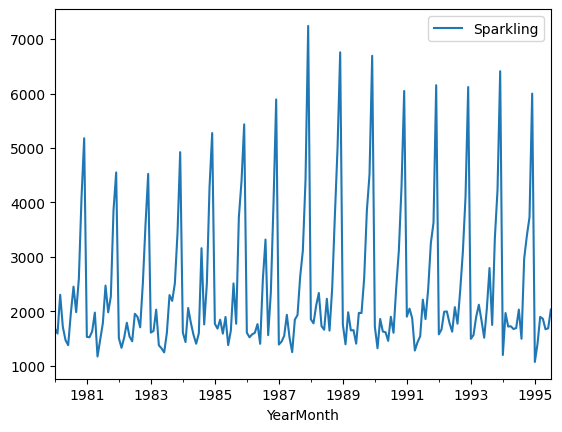

<Figure size 2000x800 with 0 Axes>

In [27]:
df.plot()
plt.figure(figsize=(20,8)) ;
plt.show();

In [28]:
df_decom_add=seasonal_decompose(df, model='additive' ,period=12)

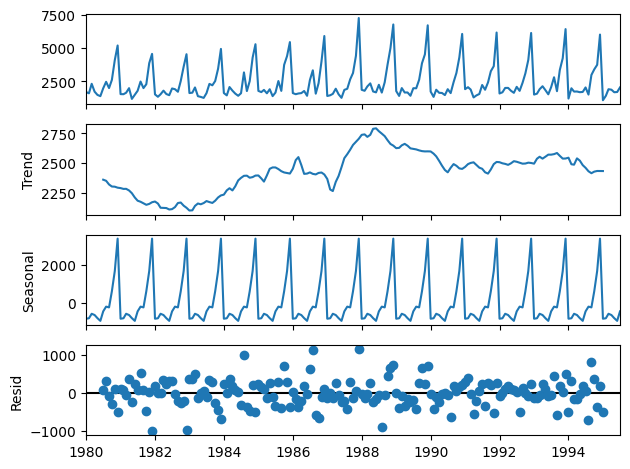

In [29]:
df_decom_add.plot()
plt.show()

In [30]:
df_mult=seasonal_decompose(df,model='multiplicative',period=12)

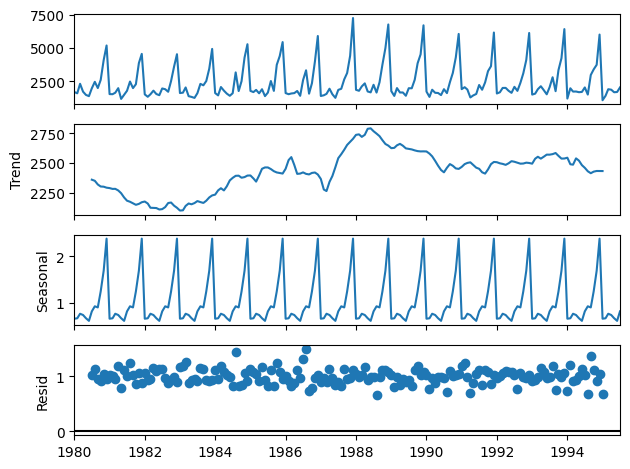

In [31]:
df_mult.plot()
plt.show()

In [32]:
trend = df_decom_add.trend
seasonality = df_decom_add.seasonal
residual = df_decom_add.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2360.666667
1980-08-01    2351.333333
1980-09-01    2320.541667
1980-10-01    2303.583333
1980-11-01    2302.041667
1980-12-01    2293.791667
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    -854.260599
1980-02-01    -830.350678
1980-03-01    -592.356630
1980-04-01    -658.490559
1980-05-01    -824.416154
1980-06-01    -967.434011
1980-07-01    -465.502265
1980-08-01    -214.332821
1980-09-01    -254.677265
1980-10-01     599.769957
1980-11-01    1675.067179
1980-12-01    3386.983846
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01     70.835599
1980-08-01    315.999487
1980-09-01    -81.864401
1980-10-01   -307.353290


In [ ]:
df.isnull().sum()

Sparkling    0
dtype: int64

In [33]:
import seaborn as sns
from matplotlib import pyplot as plt

In [34]:
# The following code is to set the subsequent figure sizes

from pylab import rcParams
rcParams['figure.figsize'] = 20,8

  Monthly Boxplot

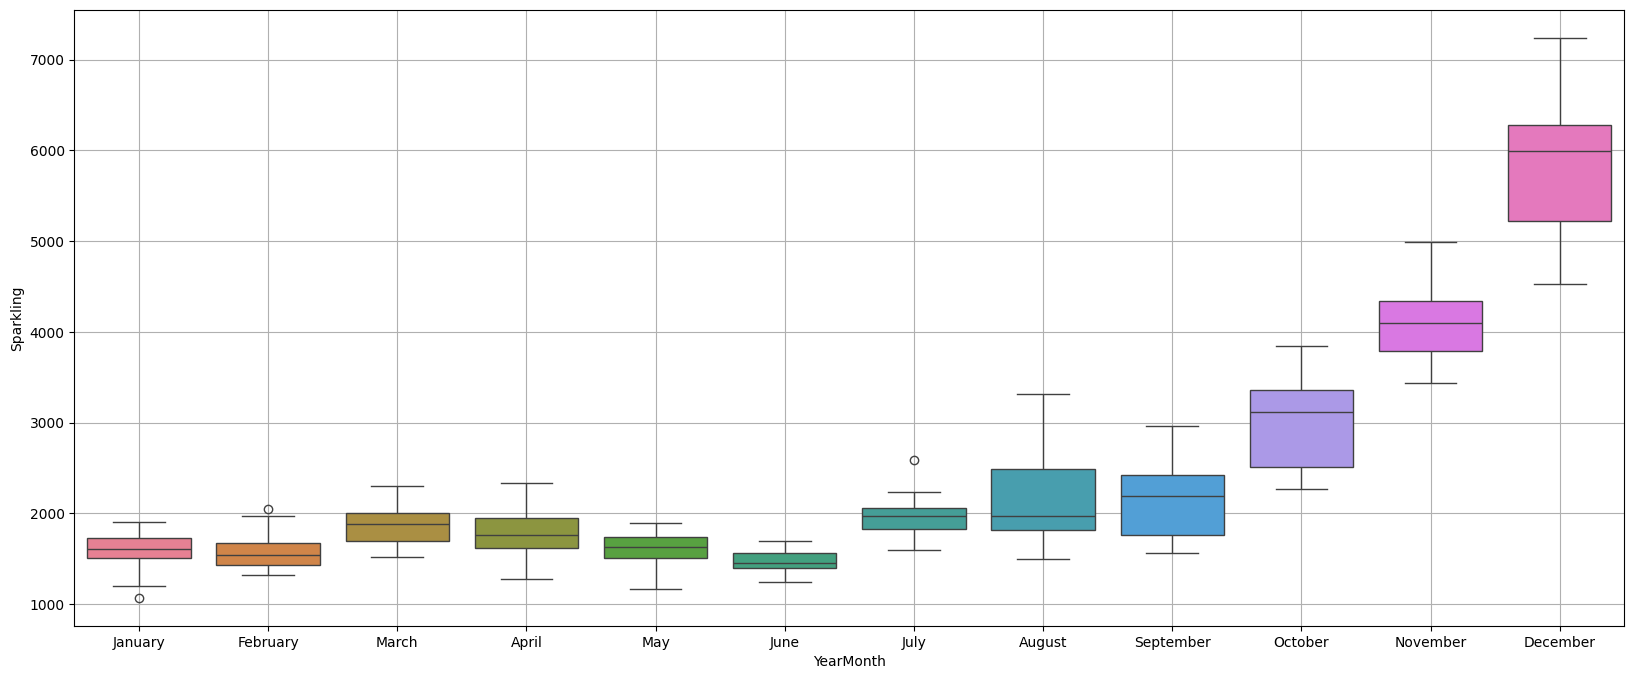

In [ ]:
sns.boxplot(x = df.index.month_name(),y = df['Sparkling'] , hue = df.index.month_name())
plt.grid();


Yearly BOXPLOT

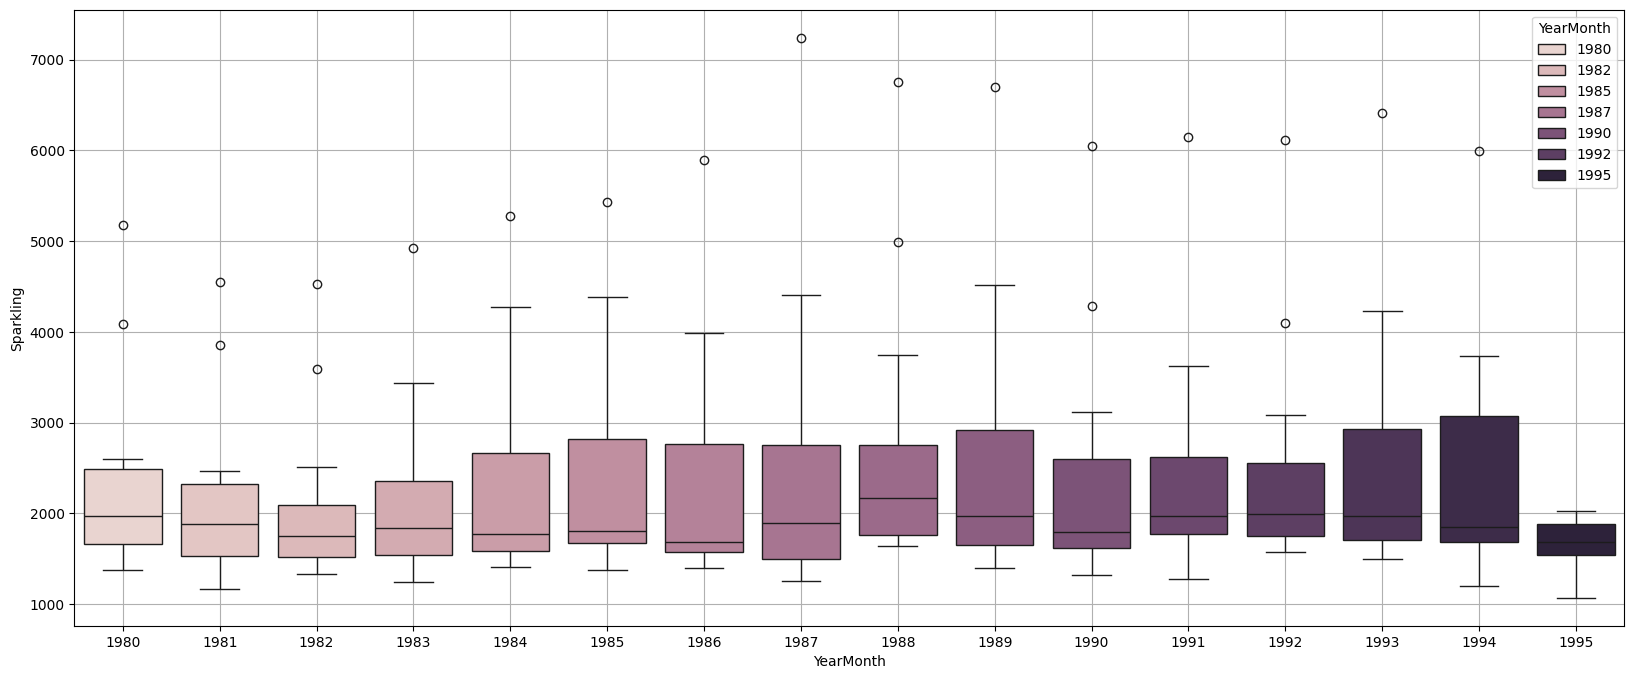

In [ ]:
sns.boxplot(x = df.index.year,y = df['Sparkling'] , hue = df.index.year )
plt.grid();

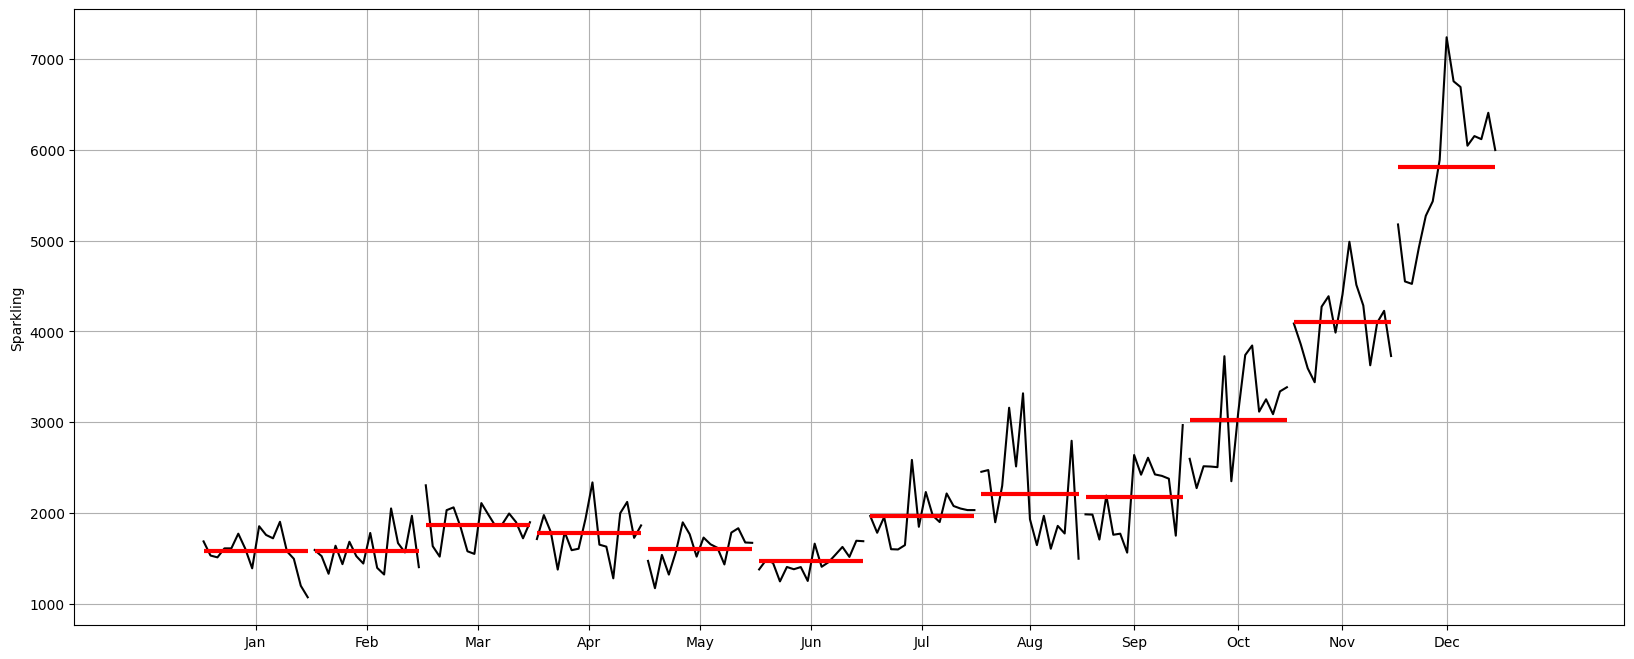

In [ ]:
from statsmodels.graphics.tsaplots import month_plot
month_plot(df['Sparkling'],ylabel='Sparkling')
plt.grid();


In [ ]:
monthly_sparkling_across_years = pd.pivot_table(df, values = 'Sparkling', columns = df.index.month, index = df.index.year)
monthly_sparkling_across_years

YearMonth      1       2       3       4       5       6       7       8   \
YearMonth                                                                   
1980       1686.0  1591.0  2304.0  1712.0  1471.0  1377.0  1966.0  2453.0   
1981       1530.0  1523.0  1633.0  1976.0  1170.0  1480.0  1781.0  2472.0   
1982       1510.0  1329.0  1518.0  1790.0  1537.0  1449.0  1954.0  1897.0   
1983       1609.0  1638.0  2030.0  1375.0  1320.0  1245.0  1600.0  2298.0   
1984       1609.0  1435.0  2061.0  1789.0  1567.0  1404.0  1597.0  3159.0   
1985       1771.0  1682.0  1846.0  1589.0  1896.0  1379.0  1645.0  2512.0   
1986       1606.0  1523.0  1577.0  1605.0  1765.0  1403.0  2584.0  3318.0   
1987       1389.0  1442.0  1548.0  1935.0  1518.0  1250.0  1847.0  1930.0   
1988       1853.0  1779.0  2108.0  2336.0  1728.0  1661.0  2230.0  1645.0   
1989       1757.0  1394.0  1982.0  1650.0  1654.0  1406.0  1971.0  1968.0   
1990       1720.0  1321.0  1859.0  1628.0  1615.0  1457.0  1899.0  1605.0   
1991       1902.0  2049.0  1874.0  1279.0  1432.0  1540.0  2214.0  1857.0   
1992       1577.0  1667.0  1993.0  1997.0  1783.0  1625.0  2076.0  1773.0   
1993       1494.0  1564.0  1898.0  2121.0  1831.0  1515.0  2048.0  2795.0   
1994       1197.0  1968.0  1720.0  1725.0  1674.0  1693.0  2031.0  1495.0   
1995       1070.0  1402.0  1897.0  1862.0  1670.0  1688.0  2031.0     NaN   

YearMonth      9       10      11      12  
YearMonth                                  
1980       1984.0  2596.0  4087.0  5179.0  
1981       1981.0  2273.0  3857.0  4551.0  
1982       1706.0  2514.0  3593.0  4524.0  
1983       2191.0  2511.0  3440.0  4923.0  
1984       1759.0  2504.0  4273.0  5274.0  
1985       1771.0  3727.0  4388.0  5434.0  
1986       1562.0  2349.0  3987.0  5891.0  
1987       2638.0  3114.0  4405.0  7242.0  
1988       2421.0  3740.0  4988.0  6757.0  
1989       2608.0  3845.0  4514.0  6694.0  
1990       2424.0  3116.0  4286.0  6047.0  
1991       2408.0  3252.0  3627.0  6153.0  
1992       2377.0  3088.0  4096.0  6119.0  
1993       1749.0  3339.0  4227.0  6410.0  
1994       2968.0  3385.0  3729.0  5999.0  
1995          NaN     NaN     NaN     NaN

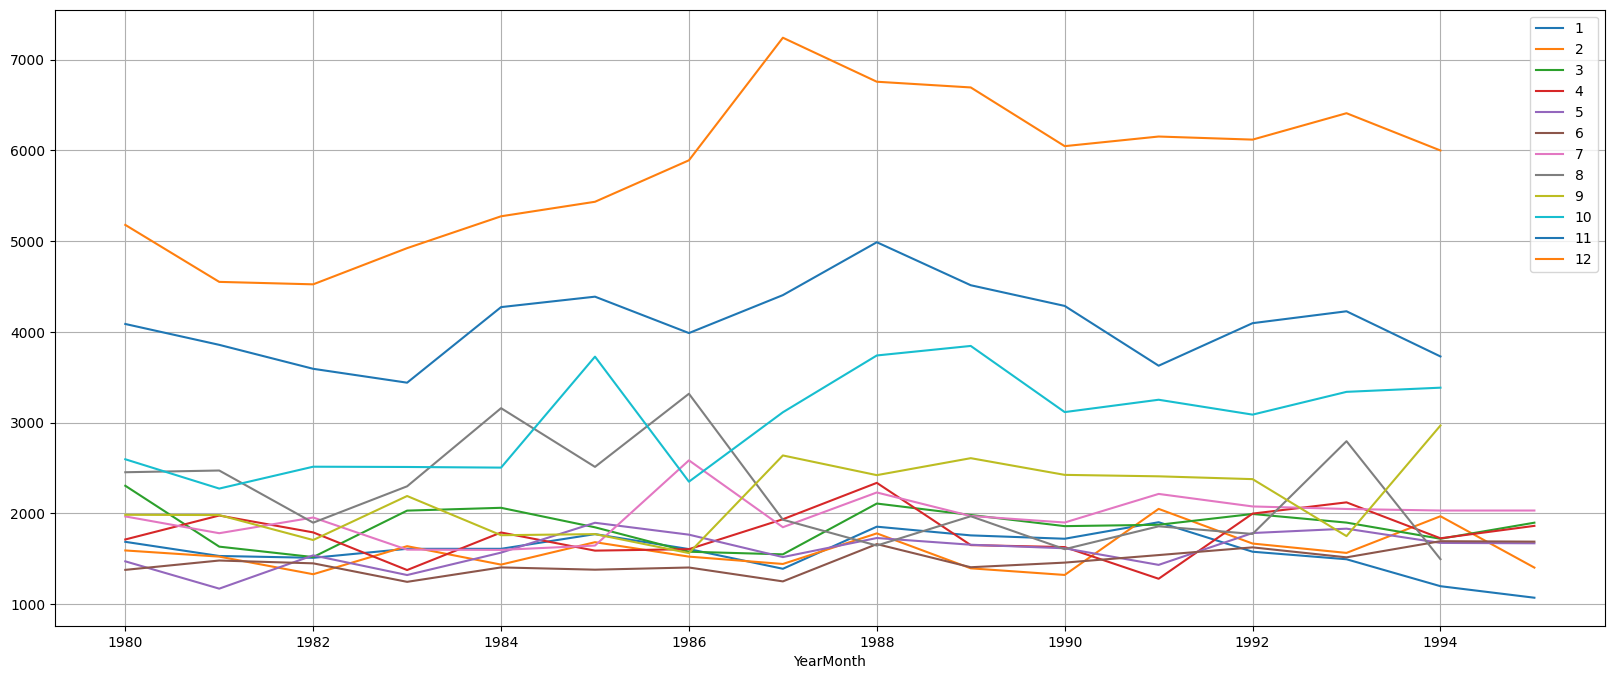

In [ ]:
monthly_sparkling_across_years.plot()
plt.grid()
plt.legend(loc='best');

Plot the Empirical Cumulative Distribution.

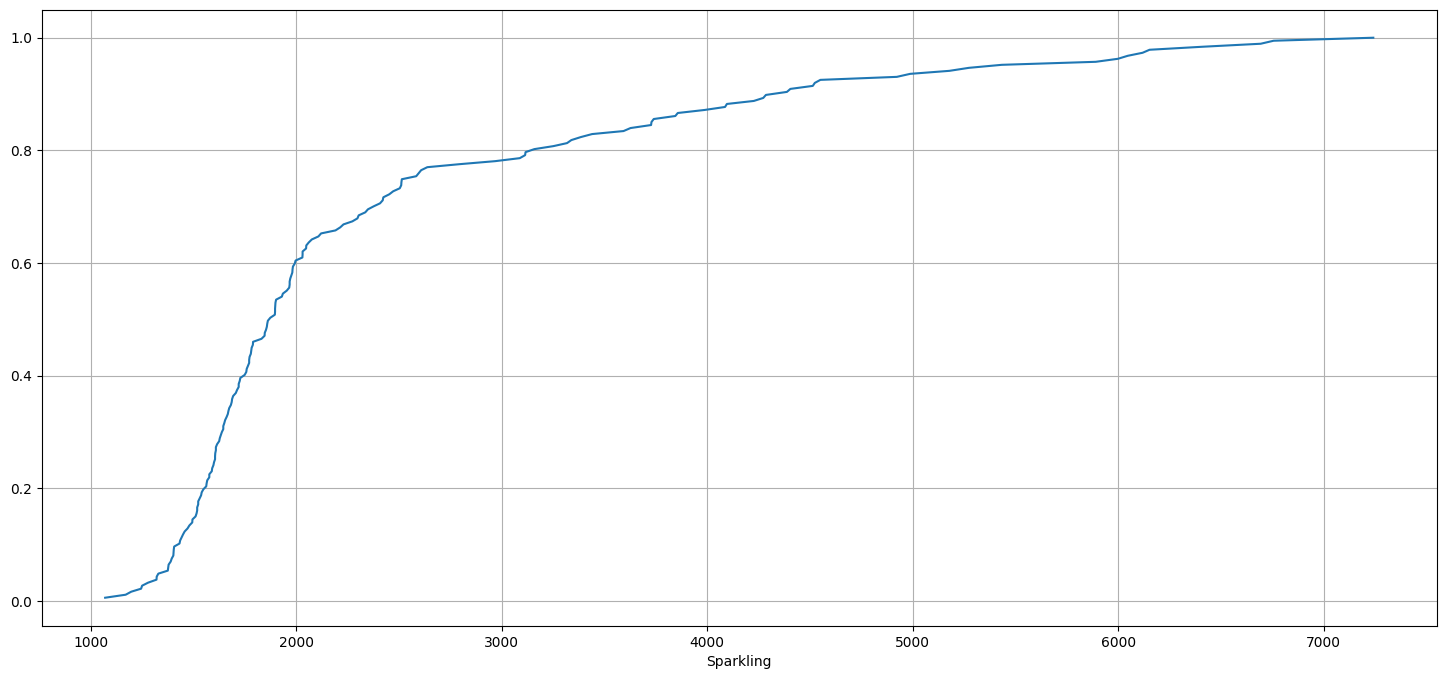

In [ ]:
# statistics
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (18, 8))
cdf = ECDF(df['Sparkling'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Sparkling');

This particular graph tells us what percentage of data points refer to what number of Sparkling.

Plot the average Sparkling per month and the month on month percentage change of Sparkling

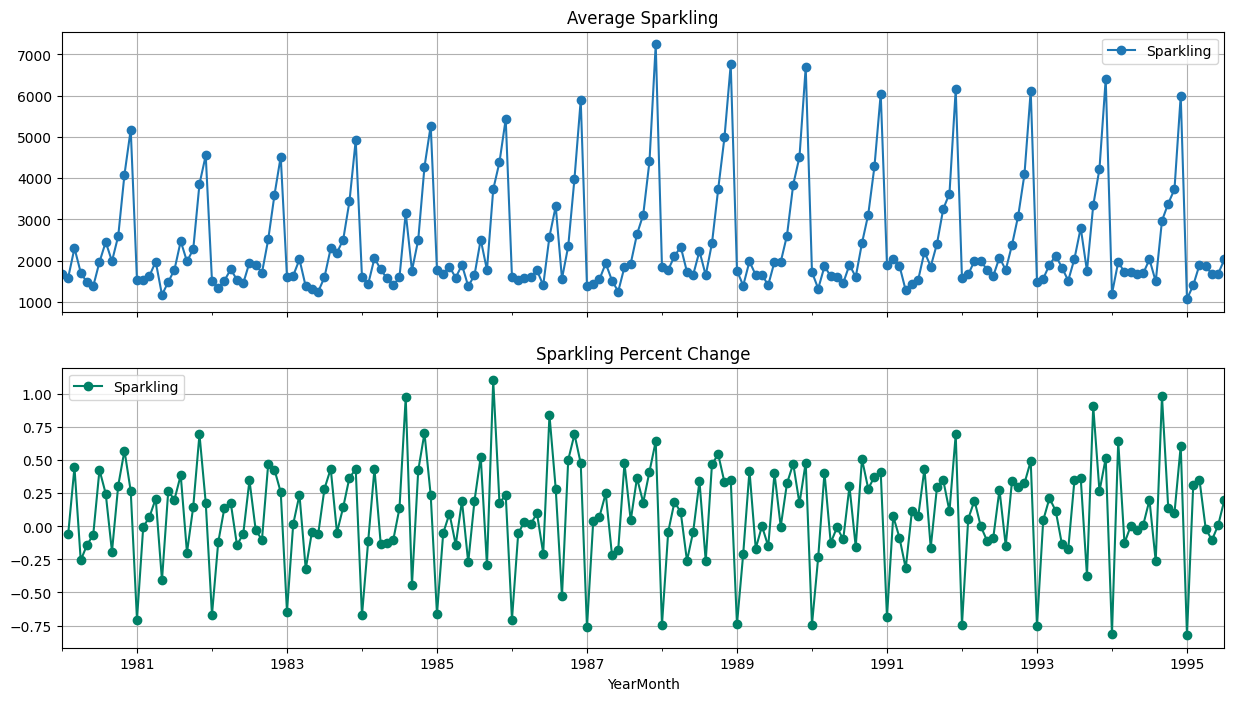

In [ ]:
# group by date and get average Sparkling, and precent change
average    = df.groupby(df.index)["Sparkling"].mean()
pct_change = df.groupby(df.index)["Sparkling"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average Sparkling over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Sparkling",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for Sparkling over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Sparkling Percent Change",grid=True)

In [35]:
train             = df[df.index<'1991']
test              = df[df.index>='1991']

In [36]:
print('Training Data')
display(train)
print('Test Data')
display(test)

Training Data


Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471
...               ...
1990-08-01       1605
1990-09-01       2424
1990-10-01       3116
1990-11-01       4286
1990-12-01       6047

[132 rows x 1 columns]

Test Data


Sparkling
YearMonth            
1991-01-01       1902
1991-02-01       2049
1991-03-01       1874
1991-04-01       1279
1991-05-01       1432
1991-06-01       1540
1991-07-01       2214
1991-08-01       1857
1991-09-01       2408
1991-10-01       3252
1991-11-01       3627
1991-12-01       6153
1992-01-01       1577
1992-02-01       1667
1992-03-01       1993
1992-04-01       1997
1992-05-01       1783
1992-06-01       1625
1992-07-01       2076
1992-08-01       1773
1992-09-01       2377
1992-10-01       3088
1992-11-01       4096
1992-12-01       6119
1993-01-01       1494
1993-02-01       1564
1993-03-01       1898
1993-04-01       2121
1993-05-01       1831
1993-06-01       1515
1993-07-01       2048
1993-08-01       2795
1993-09-01       1749
1993-10-01       3339
1993-11-01       4227
1993-12-01       6410
1994-01-01       1197
1994-02-01       1968
1994-03-01       1720
1994-04-01       1725
1994-05-01       1674
1994-06-01       1693
1994-07-01       2031
1994-08-01       1495
1994-09-01       2968
1994-10-01       3385
1994-11-01       3729
1994-12-01       5999
1995-01-01       1070
1995-02-01       1402
1995-03-01       1897
1995-04-01       1862
1995-05-01       1670
1995-06-01       1688
1995-07-01       2031

In [37]:
test.describe()

Sparkling
count    55.000000
mean   2399.145455
std    1286.825457
min    1070.000000
25%    1672.000000
50%    1898.000000
75%    2601.500000
max    6410.000000

In [ ]:
train.describe()

Sparkling
count   132.000000
mean   2403.780303
std    1303.430250
min    1170.000000
25%    1595.500000
50%    1850.000000
75%    2531.500000
max    7242.000000

In [ ]:
df.describe()

Sparkling
count   187.000000
mean   2402.417112
std    1295.111540
min    1070.000000
25%    1605.000000
50%    1874.000000
75%    2549.000000
max    7242.000000

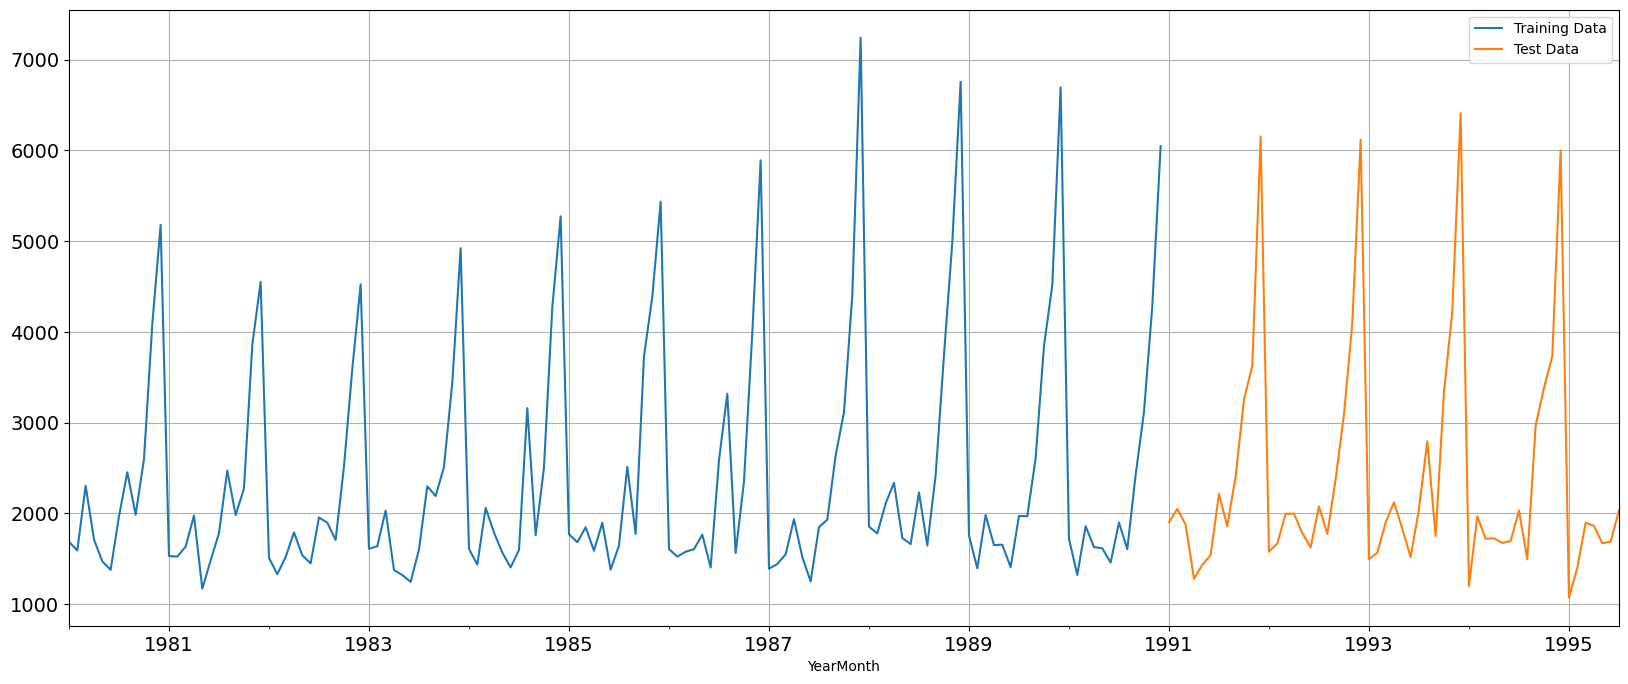

In [38]:
train['Sparkling'].plot(fontsize=14)
test['Sparkling'].plot(fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

Model 1: Linear Regression

In [39]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


In [40]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [41]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [42]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data')
display(LinearRegression_train.head())
print('Last few rows of Training Data')
display(LinearRegression_train.tail())
print('First few rows of Test Data')
display(LinearRegression_test.head())
print('Last few rows of Test Data')
display(LinearRegression_test.tail())

First few rows of Training Data


Sparkling  time
YearMonth                  
1980-01-01       1686     1
1980-02-01       1591     2
1980-03-01       2304     3
1980-04-01       1712     4
1980-05-01       1471     5

Last few rows of Training Data


Sparkling  time
YearMonth                  
1990-08-01       1605   128
1990-09-01       2424   129
1990-10-01       3116   130
1990-11-01       4286   131
1990-12-01       6047   132

First few rows of Test Data


Sparkling  time
YearMonth                  
1991-01-01       1902   133
1991-02-01       2049   134
1991-03-01       1874   135
1991-04-01       1279   136
1991-05-01       1432   137

Last few rows of Test Data


Sparkling  time
YearMonth                  
1995-03-01       1897   183
1995-04-01       1862   184
1995-05-01       1670   185
1995-06-01       1688   186
1995-07-01       2031   187

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
lr = LinearRegression()

In [45]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'])

LinearRegression()

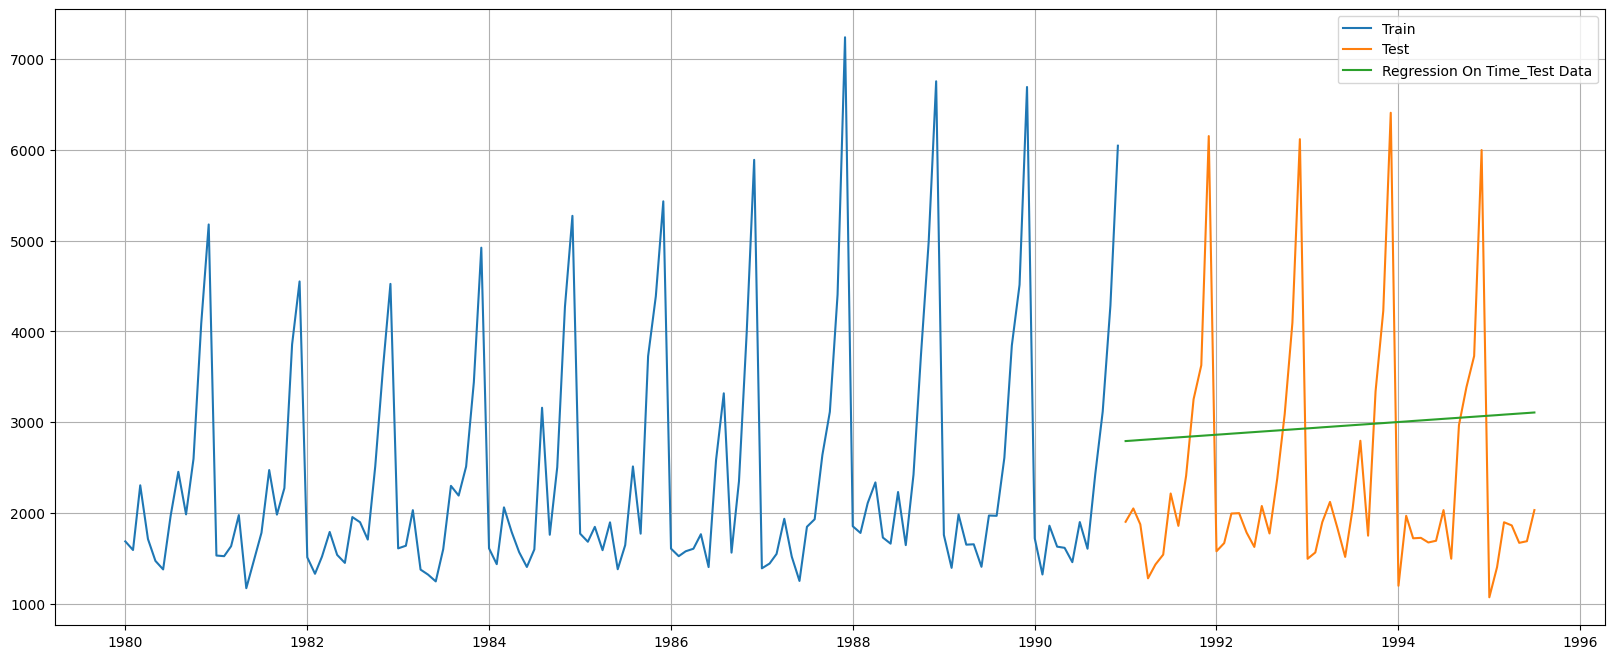

In [46]:
train_predictions_model1         = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.legend(loc='best')
plt.grid();

In [47]:
from sklearn import metrics

In [48]:
rmse_model1_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f " %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1389.135 


In [49]:
resultsDf = pd.DataFrame({'RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

RMSE
RegressionOnTime  1389.135175

Model 2: Naive Approach:

In [50]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [51]:
train.tail()

Sparkling
YearMonth            
1990-08-01       1605
1990-09-01       2424
1990-10-01       3116
1990-11-01       4286
1990-12-01       6047

In [52]:
NaiveModel_test['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    6047
1991-02-01    6047
1991-03-01    6047
1991-04-01    6047
1991-05-01    6047
Name: naive, dtype: int64

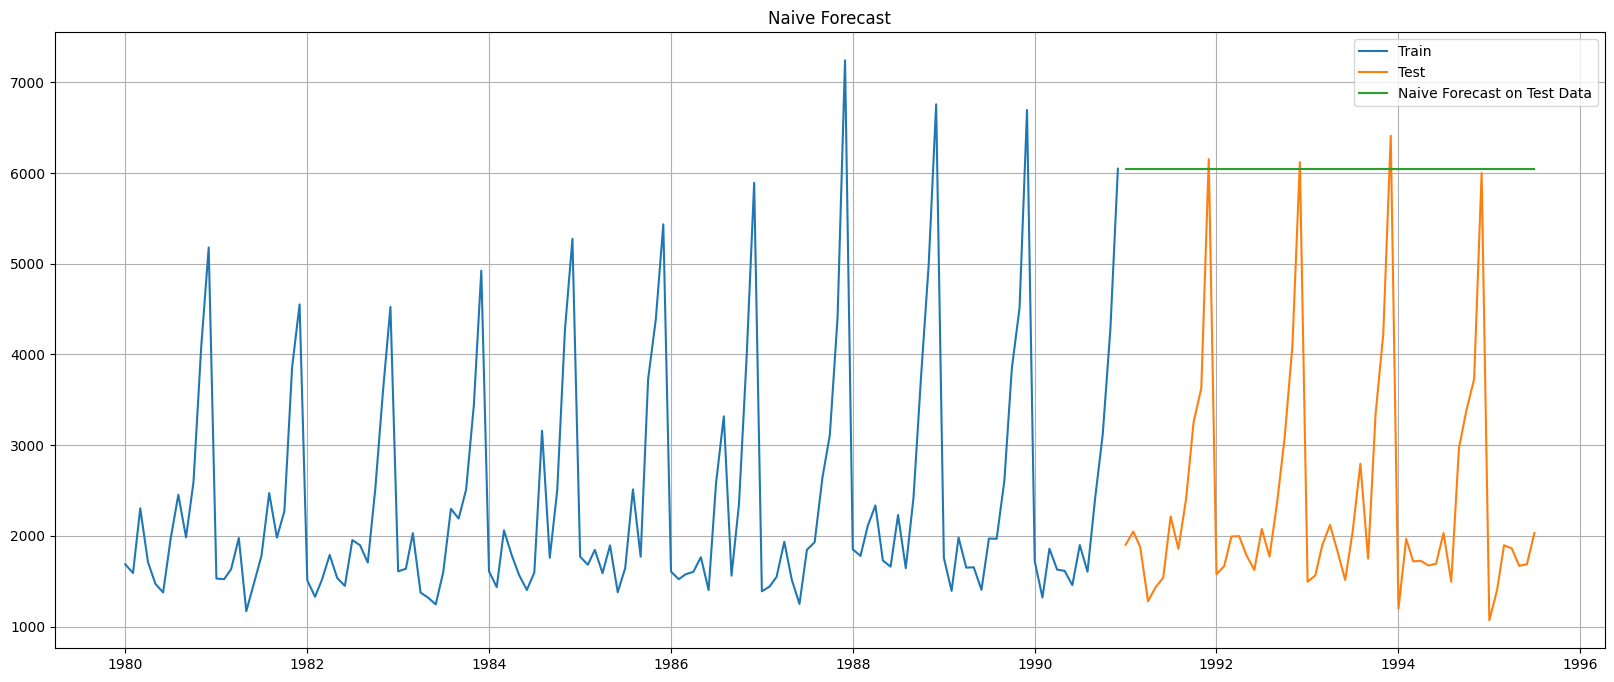

In [53]:
plt.plot(NaiveModel_train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [54]:
rmse_model2_test = metrics.mean_squared_error(test['Sparkling'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 3864.279


In [55]:
resultsDf_2 = pd.DataFrame({'RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

RMSE
RegressionOnTime  1389.135175
NaiveModel        3864.279352

Method 3: Simple Average

In [56]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [57]:
SimpleAverage_test['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_test.head()

Sparkling  mean_forecast
YearMonth                           
1991-01-01       1902    2403.780303
1991-02-01       2049    2403.780303
1991-03-01       1874    2403.780303
1991-04-01       1279    2403.780303
1991-05-01       1432    2403.780303

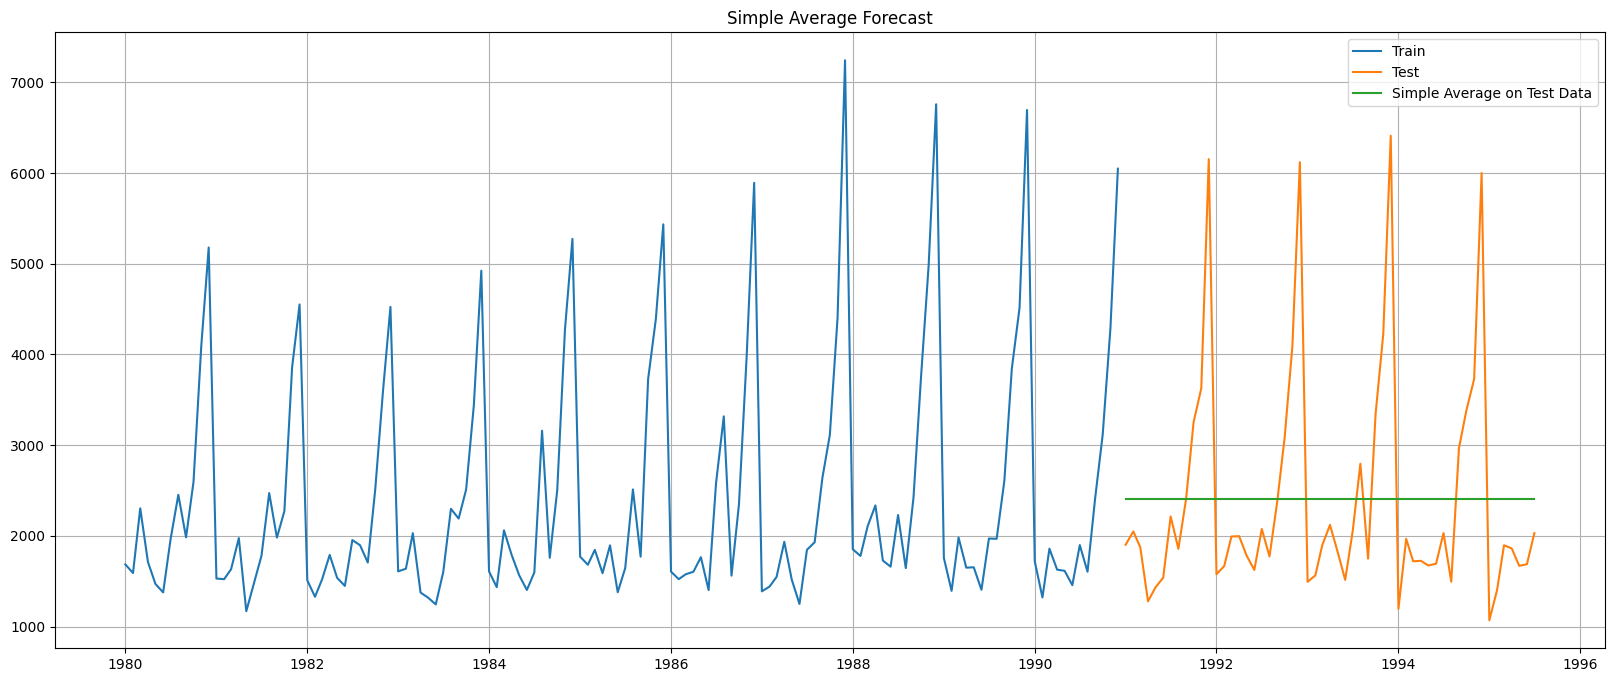

In [58]:
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [59]:
rmse_model3_test = metrics.mean_squared_error(test['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 1275.082


In [60]:
resultsDf_3 = pd.DataFrame({'RMSE': [rmse_model3_test]}
                           ,index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

RMSE
RegressionOnTime    1389.135175
NaiveModel          3864.279352
SimpleAverageModel  1275.081804

Method 4: Moving Average(MA)

In [61]:
MovingAverage = df.copy()
MovingAverage.head()

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

Trailing moving averages

In [62]:
MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

MovingAverage.head()

Sparkling  Trailing_2  Trailing_4  Trailing_6  Trailing_9
YearMonth                                                            
1980-01-01       1686         NaN         NaN         NaN         NaN
1980-02-01       1591      1638.5         NaN         NaN         NaN
1980-03-01       2304      1947.5         NaN         NaN         NaN
1980-04-01       1712      2008.0     1823.25         NaN         NaN
1980-05-01       1471      1591.5     1769.50         NaN         NaN

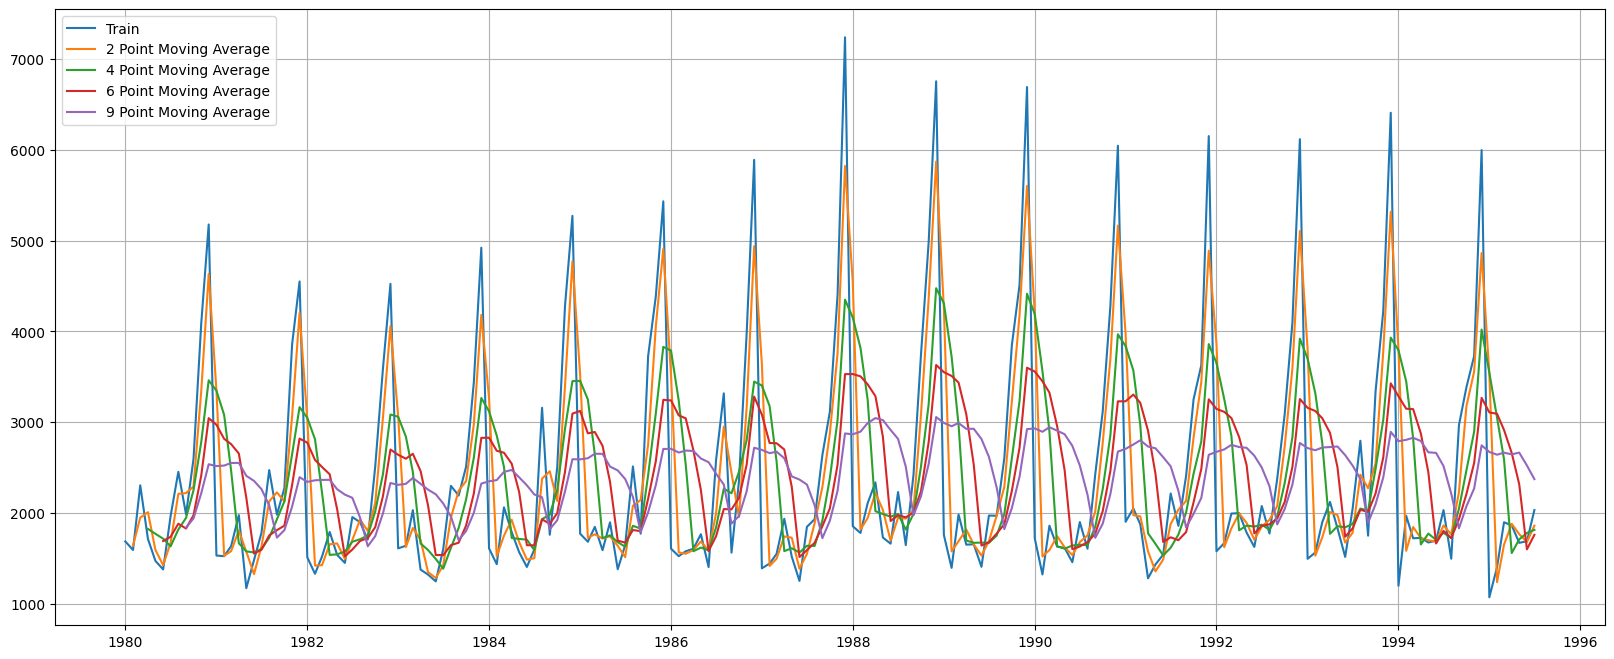

In [63]:
## Plotting on the whole data

plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [64]:
#Creating train and test set
trailing_MovingAverage_train=MovingAverage[MovingAverage.index < '1991-01-01']
trailing_MovingAverage_test=MovingAverage[MovingAverage.index >= '1991-01-01']
print(trailing_MovingAverage_test.shape)
print(trailing_MovingAverage_train.shape)

(55, 5)
(132, 5)


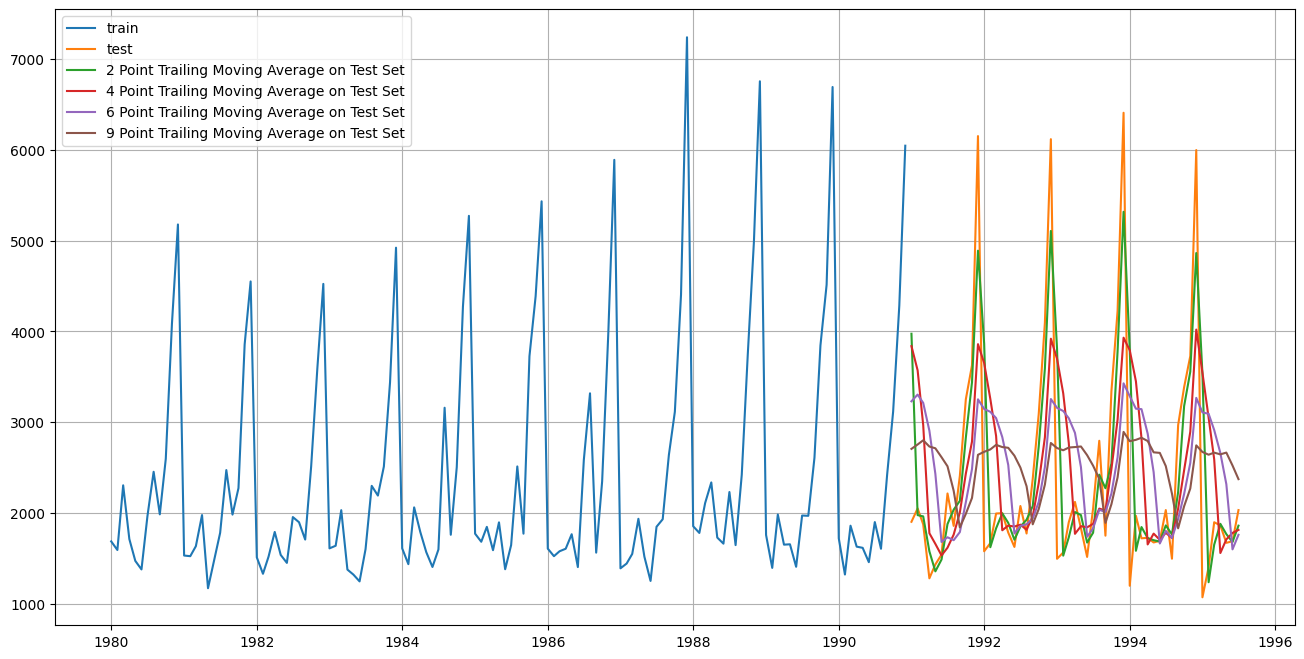

In [ ]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='test')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();

In [65]:
## Test Data - RMSE --> 2 point Trailing MA
rmse_model4_test_2 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_2'],squared=False)

## Test Data - RMSE  --> 4 point Trailing MA
rmse_model4_test_4 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_4'],squared=False)

## Test Data - RMSE --> 6 point Trailing MA
rmse_model4_test_6 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_6'],squared=False)

## Test Data - RMSE  --> 9 point Trailing MA
rmse_model4_test_9 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_9'],squared=False)

In [66]:
resultsDf_4 = pd.DataFrame({'RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

RMSE
RegressionOnTime             1389.135175
NaiveModel                   3864.279352
SimpleAverageModel           1275.081804
2pointTrailingMovingAverage   813.400684
4pointTrailingMovingAverage  1156.589694
6pointTrailingMovingAverage  1283.927428
9pointTrailingMovingAverage  1346.278315

SES - ETS(A, N, N) - Simple Exponential Smoothing with additive errors

In [67]:
# create class
model_SES = SimpleExpSmoothing(train,initialization_method='estimated')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [68]:
# Fitting the Simple Exponential Smoothing model and asking python to choose the optimal parameters
model_SES_autofit = model_SES.fit(optimized=True)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [69]:
## Let us check the parameters

model_SES_autofit.params

{'smoothing_level': 0.07028781460389563,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1763.9269926897732,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [70]:
# Using the fitted model on the training set to forecast on the test set
SES_predict = model_SES_autofit.forecast(steps=len(test))
SES_predict

1991-01-01    2804.662714
1991-02-01    2804.662714
1991-03-01    2804.662714
1991-04-01    2804.662714
1991-05-01    2804.662714
1991-06-01    2804.662714
1991-07-01    2804.662714
1991-08-01    2804.662714
1991-09-01    2804.662714
1991-10-01    2804.662714
1991-11-01    2804.662714
1991-12-01    2804.662714
1992-01-01    2804.662714
1992-02-01    2804.662714
1992-03-01    2804.662714
1992-04-01    2804.662714
1992-05-01    2804.662714
1992-06-01    2804.662714
1992-07-01    2804.662714
1992-08-01    2804.662714
1992-09-01    2804.662714
1992-10-01    2804.662714
1992-11-01    2804.662714
1992-12-01    2804.662714
1993-01-01    2804.662714
1993-02-01    2804.662714
1993-03-01    2804.662714
1993-04-01    2804.662714
1993-05-01    2804.662714
1993-06-01    2804.662714
1993-07-01    2804.662714
1993-08-01    2804.662714
1993-09-01    2804.662714
1993-10-01    2804.662714
1993-11-01    2804.662714
1993-12-01    2804.662714
1994-01-01    2804.662714
1994-02-01    2804.662714
1994-03-01  

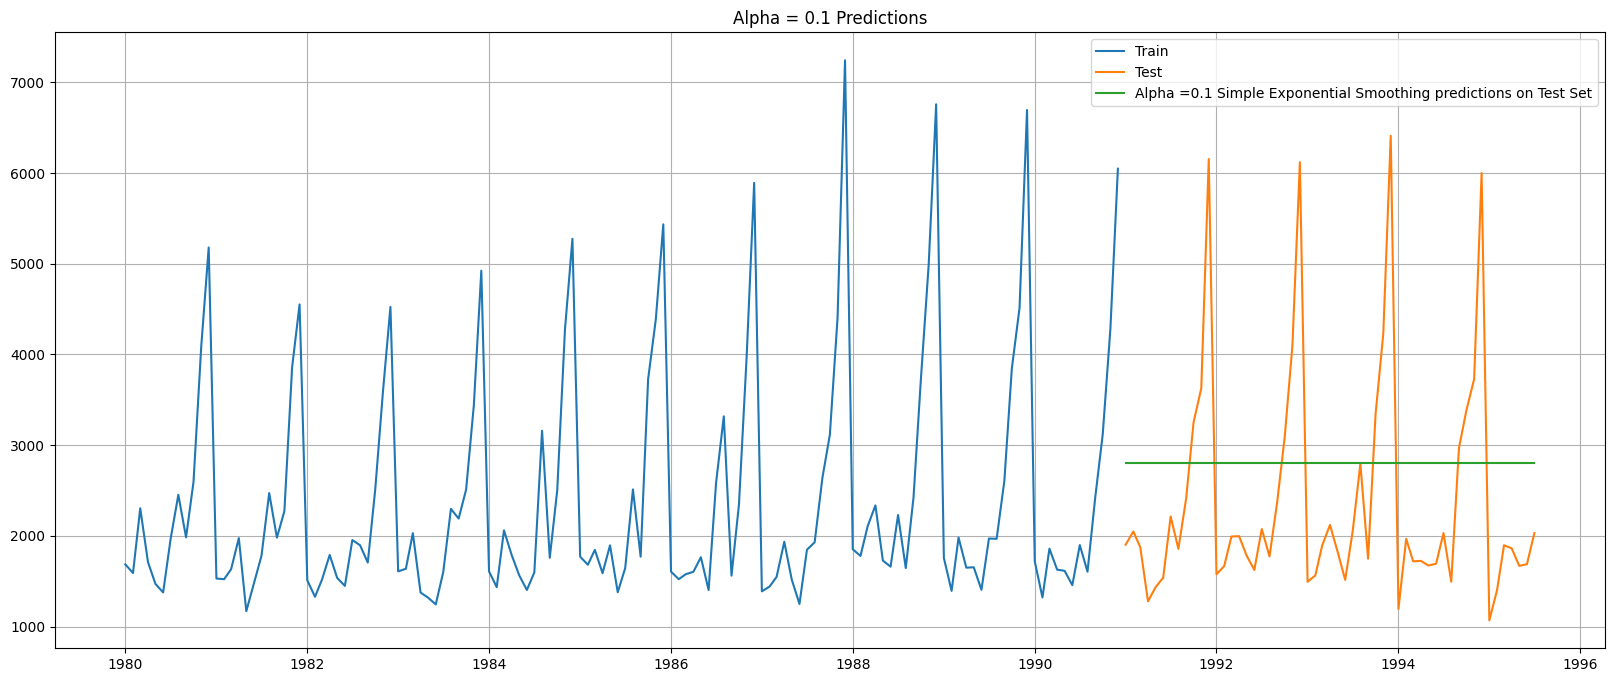

In [75]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha =0.1 Simple Exponential Smoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.1 Predictions');

In [76]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [73]:
print('SES RMSE:',mean_squared_error(test.values,SES_predict.values,squared=False))
#different way to calculate RMSE
print('SES RMSE (calculated using statsmodels):',em.rmse(test.values,SES_predict.values)[0])

SES RMSE: 1338.0046232563645
SES RMSE (calculated using statsmodels): 1338.0046232563645


In [74]:
resultsDf_5 = pd.DataFrame({'RMSE': [em.rmse(test.values,SES_predict.values)[0]]},index=['Alpha=0.1,SES'])
resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

RMSE
RegressionOnTime             1389.135175
NaiveModel                   3864.279352
SimpleAverageModel           1275.081804
2pointTrailingMovingAverage   813.400684
4pointTrailingMovingAverage  1156.589694
6pointTrailingMovingAverage  1283.927428
9pointTrailingMovingAverage  1346.278315
Alpha=0.1,SES                1338.004623

Holt - ETS(A, A, N) - Holt's linear method with additive errors

In [77]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(train,initialization_method='estimated')
# Fitting the model
model_DES = model_DES.fit()

print('')
print('==Holt model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES.params)


==Holt model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.6649999999999999, 'smoothing_trend': 0.0001, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1502.1999999999998, 'initial_trend': 74.87272727272733, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [78]:
# Forecasting using this model for the duration of the test set
DES_predict =  model_DES.forecast(len(test))
DES_predict

1991-01-01    5401.733026
1991-02-01    5476.005230
1991-03-01    5550.277433
1991-04-01    5624.549637
1991-05-01    5698.821840
1991-06-01    5773.094044
1991-07-01    5847.366248
1991-08-01    5921.638451
1991-09-01    5995.910655
1991-10-01    6070.182858
1991-11-01    6144.455062
1991-12-01    6218.727266
1992-01-01    6292.999469
1992-02-01    6367.271673
1992-03-01    6441.543876
1992-04-01    6515.816080
1992-05-01    6590.088284
1992-06-01    6664.360487
1992-07-01    6738.632691
1992-08-01    6812.904894
1992-09-01    6887.177098
1992-10-01    6961.449302
1992-11-01    7035.721505
1992-12-01    7109.993709
1993-01-01    7184.265912
1993-02-01    7258.538116
1993-03-01    7332.810320
1993-04-01    7407.082523
1993-05-01    7481.354727
1993-06-01    7555.626930
1993-07-01    7629.899134
1993-08-01    7704.171338
1993-09-01    7778.443541
1993-10-01    7852.715745
1993-11-01    7926.987948
1993-12-01    8001.260152
1994-01-01    8075.532356
1994-02-01    8149.804559
1994-03-01  

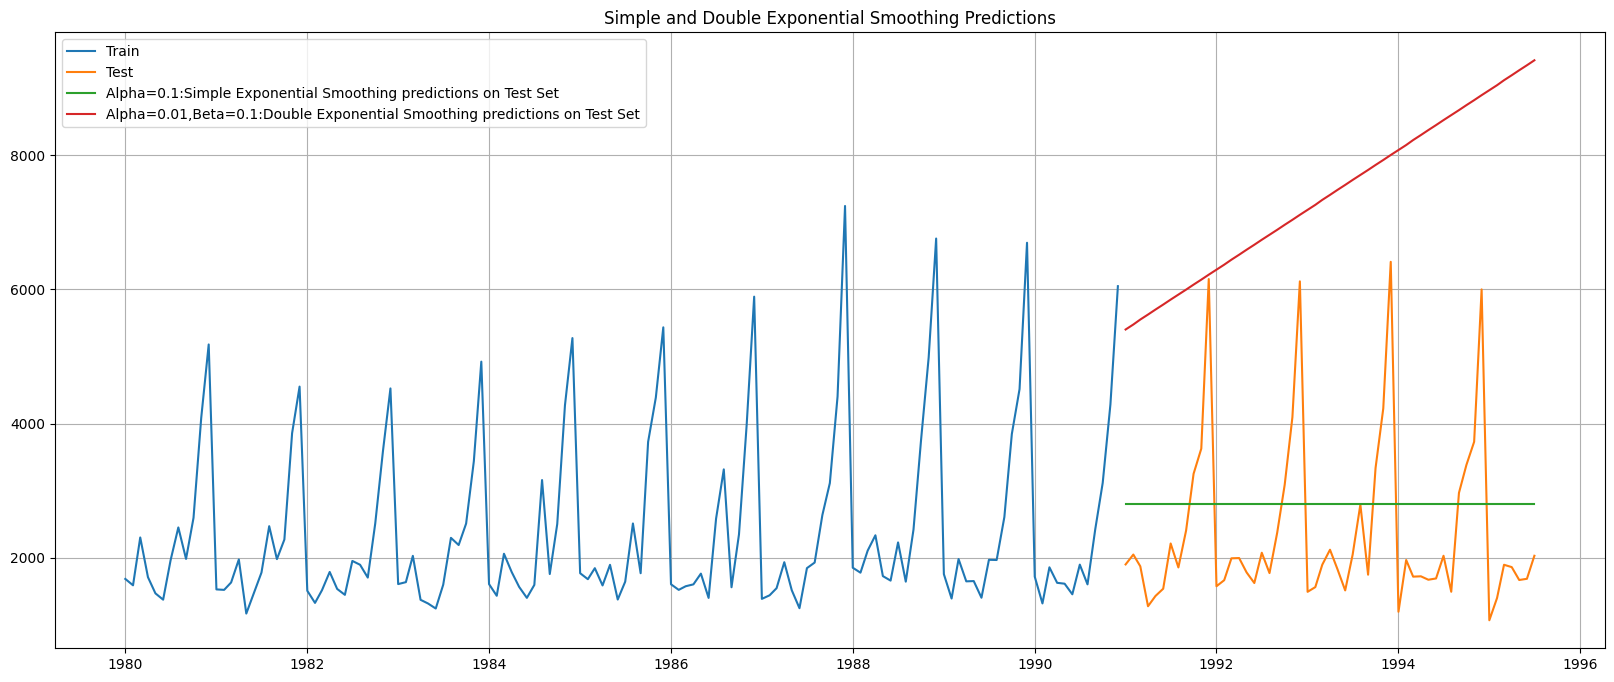

In [79]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.1:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.01,Beta=0.1:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');

In [81]:
print('DES RMSE:',mean_squared_error(test.values,DES_predict.values,squared=False))

DES RMSE: 5291.879833226911


In [80]:
resultsDf_6 = pd.DataFrame({'RMSE': [mean_squared_error(test.values,DES_predict.values,squared=False)]}
                           ,index=['Alpha=0.1,Beta=0.1:DES'])
resultsDf = pd.concat([resultsDf, resultsDf_6])
resultsDf

RMSE
RegressionOnTime             1389.135175
NaiveModel                   3864.279352
SimpleAverageModel           1275.081804
2pointTrailingMovingAverage   813.400684
4pointTrailingMovingAverage  1156.589694
6pointTrailingMovingAverage  1283.927428
9pointTrailingMovingAverage  1346.278315
Alpha=0.1,SES                1338.004623
Alpha=0.1,Beta=0.1:DES       5291.879833

Holt-Winters - ETS(A, A, A) - Holt Winter's linear method with additive errors

In [83]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(train,trend='additive',seasonal='additive',initialization_method='estimated')
# Fitting the model
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.11127217859992398, 'smoothing_trend': 0.01236078328796452, 'smoothing_seasonal': 0.4607177642170641, 'damping_trend': nan, 'initial_level': 2356.578308185137, 'initial_trend': -0.01853556812789492, 'initial_seasons': array([-636.23360535, -722.98363367, -398.6436108 , -473.43084469,
       -808.42525514, -815.35024951, -384.23066987,   72.99508063,
       -237.44272911,  272.32584554, 1541.3782103 , 2590.0775386 ]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [84]:
# Forecasting using this model for the duration of the test set
TES_predict =  model_TES.forecast(len(test))
TES_predict

1991-01-01    1490.574426
1991-02-01    1204.714325
1991-03-01    1688.941106
1991-04-01    1551.450810
1991-05-01    1461.440427
1991-06-01    1278.907163
1991-07-01    1805.164022
1991-08-01    1679.251392
1991-09-01    2315.687649
1991-10-01    3225.308906
1991-11-01    4299.652360
1991-12-01    6411.161332
1992-01-01    1483.296578
1992-02-01    1197.436477
1992-03-01    1681.663258
1992-04-01    1544.172962
1992-05-01    1454.162580
1992-06-01    1271.629315
1992-07-01    1797.886174
1992-08-01    1671.973544
1992-09-01    2308.409801
1992-10-01    3218.031058
1992-11-01    4292.374513
1992-12-01    6403.883484
1993-01-01    1476.018731
1993-02-01    1190.158629
1993-03-01    1674.385411
1993-04-01    1536.895114
1993-05-01    1446.884732
1993-06-01    1264.351467
1993-07-01    1790.608327
1993-08-01    1664.695696
1993-09-01    2301.131954
1993-10-01    3210.753211
1993-11-01    4285.096665
1993-12-01    6396.605637
1994-01-01    1468.740883
1994-02-01    1182.880782
1994-03-01  

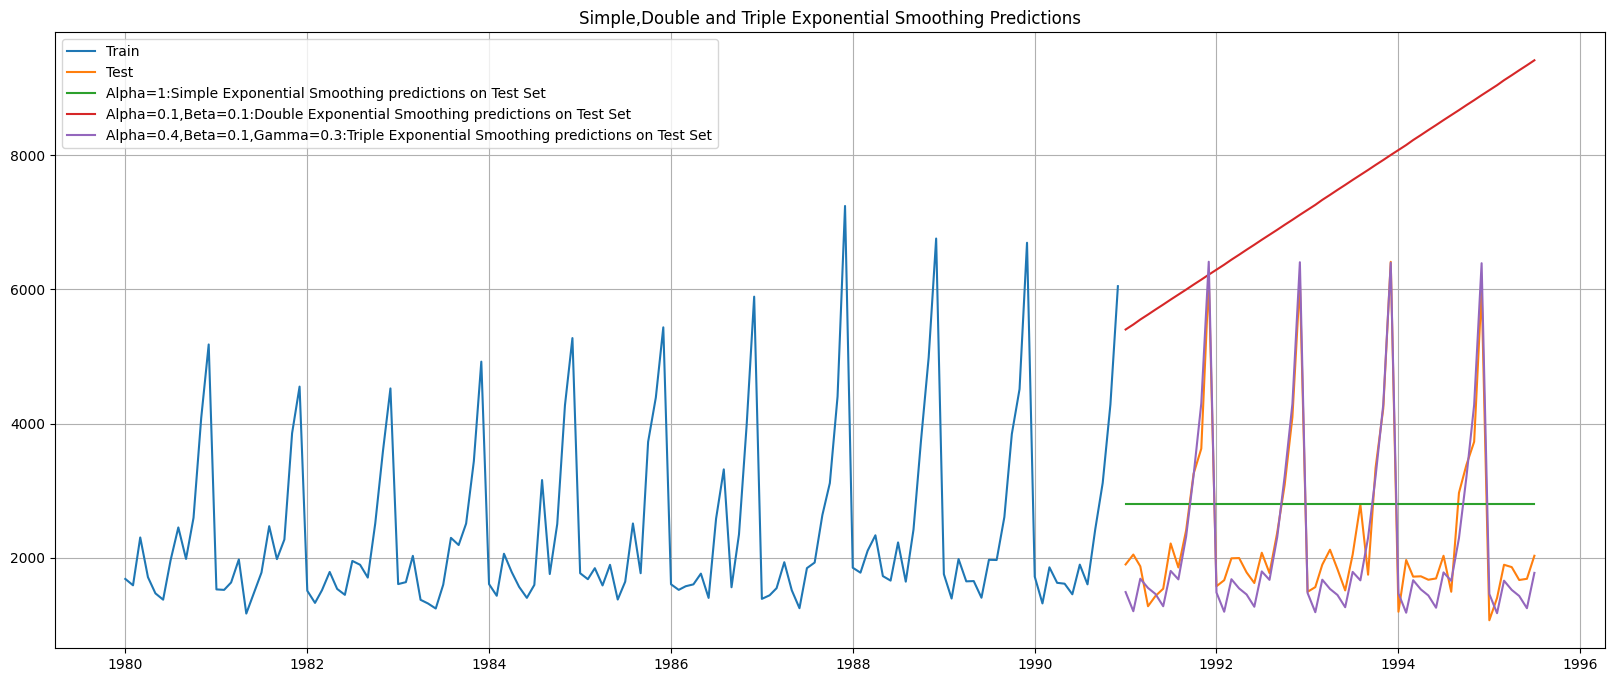

In [85]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=1:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.1,Beta=0.1:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.4,Beta=0.1,Gamma=0.3:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

In [86]:
print('TES RMSE:',mean_squared_error(test.values,TES_predict.values,squared=False))

TES RMSE: 378.6262408893861


In [87]:
resultsDf_7 = pd.DataFrame({'RMSE': [mean_squared_error(test.values,TES_predict.values,squared=False)]}
                           ,index=['Alpha=0.4,Beta=0.1,Gamma=0.3:TES'])
resultsDf = pd.concat([resultsDf, resultsDf_7])
resultsDf

RMSE
RegressionOnTime                  1389.135175
NaiveModel                        3864.279352
SimpleAverageModel                1275.081804
2pointTrailingMovingAverage        813.400684
4pointTrailingMovingAverage       1156.589694
6pointTrailingMovingAverage       1283.927428
9pointTrailingMovingAverage       1346.278315
Alpha=0.1,SES                     1338.004623
Alpha=0.1,Beta=0.1:DES            5291.879833
Alpha=0.4,Beta=0.1,Gamma=0.3:TES   378.626241

Holt-Winters - ETS(A, A, M) - Holt Winter's linear method

In [88]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(train,trend='add',seasonal='multiplicative',initialization_method='estimated')
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.11119949831569428, 'smoothing_trend': 0.049430920023313805, 'smoothing_seasonal': 0.3620525701498937, 'damping_trend': nan, 'initial_level': 2356.5264391986907, 'initial_trend': -9.443690175376352, 'initial_seasons': array([0.71325627, 0.68332509, 0.90537798, 0.80561841, 0.65639659,
       0.65451508, 0.88690241, 1.13423953, 0.91927727, 1.21396745,
       1.86941738, 2.3734461 ]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [89]:
# Forecasting using this model for the duration of the test set
TES_predict_am =  model_TES_am.forecast(len(test))
TES_predict_am

1991-01-01    1587.685845
1991-02-01    1356.590237
1991-03-01    1763.121866
1991-04-01    1656.379813
1991-05-01    1542.186697
1991-06-01    1355.276292
1991-07-01    1854.460265
1991-08-01    1820.822870
1991-09-01    2277.203230
1991-10-01    3122.460625
1991-11-01    4129.148636
1991-12-01    5891.184787
1992-01-01    1538.578232
1992-02-01    1314.522051
1992-03-01    1708.305381
1992-04-01    1604.748228
1992-05-01    1493.989468
1992-06-01    1312.809887
1992-07-01    1796.200235
1992-08-01    1763.469447
1992-09-01    2205.285676
1992-10-01    3023.588340
1992-11-01    3998.053790
1992-12-01    5703.651532
1993-01-01    1489.470618
1993-02-01    1272.453864
1993-03-01    1653.488895
1993-04-01    1553.116644
1993-05-01    1445.792238
1993-06-01    1270.343481
1993-07-01    1737.940206
1993-08-01    1706.116024
1993-09-01    2133.368122
1993-10-01    2924.716056
1993-11-01    3866.958944
1993-12-01    5516.118277
1994-01-01    1440.363005
1994-02-01    1230.385677
1994-03-01  

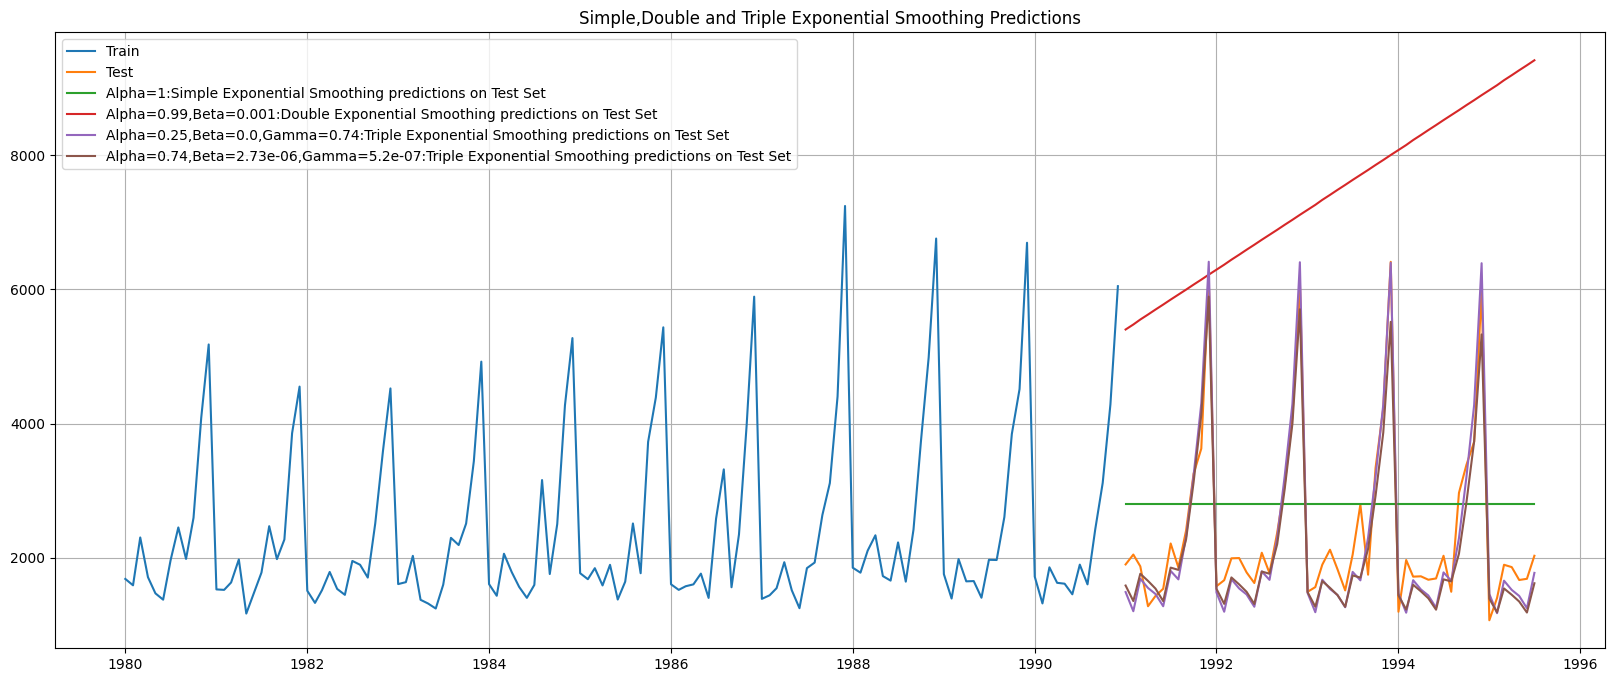

In [90]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=1:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.99,Beta=0.001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.25,Beta=0.0,Gamma=0.74:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_am, label='Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

In [ ]:
print('TES_am RMSE:',mean_squared_error(test.values,TES_predict_am.values,squared=False))

TES_am RMSE: 403.7062277856435


In [ ]:
resultsDf_8 = pd.DataFrame({'RMSE': [mean_squared_error(test.values,TES_predict_am.values,squared=False)]}
                           ,index=['Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES'])
resultsDf = pd.concat([resultsDf, resultsDf_8])
resultsDf

RMSE
RegressionOnTime                                    1389.135175
NaiveModel                                          3864.279352
SimpleAverageModel                                  1275.081804
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha=0.995,SES                                     1338.004623
Alpha=1,Beta=0.0189:DES                             5291.879833
Alpha=0.25,Beta=0.0,Gamma=0.74:TES                   378.626241
Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES   403.706228

check for Stationarity?

In [91]:
from statsmodels.tsa.stattools import adfuller

In [92]:
import sys
import warnings
import itertools
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline

In [93]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

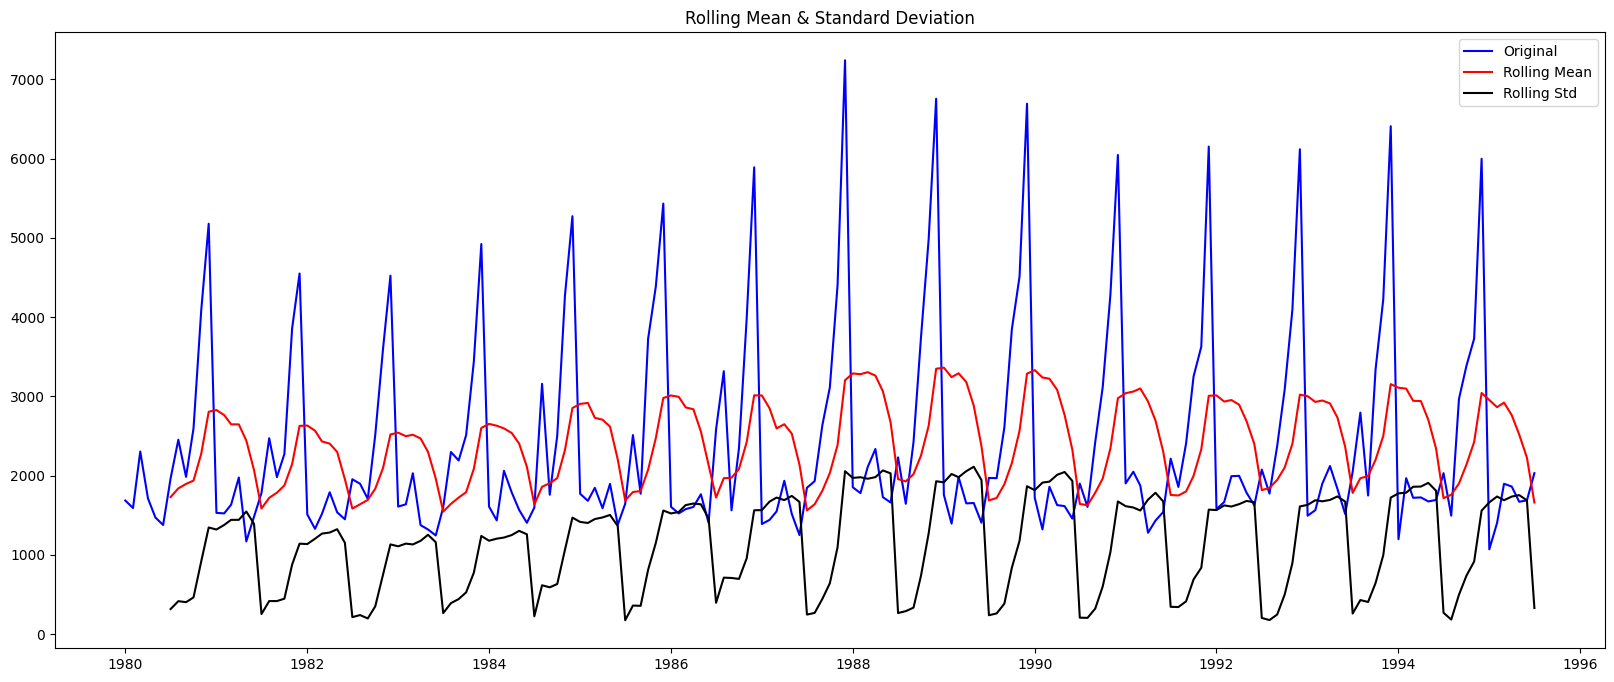

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [94]:
test_stationarity(df['Sparkling'])

We see that at 5% significant level the Time Series is non-stationary.

Let us take a difference of order 1 and check whether the Time Series is stationary or not.

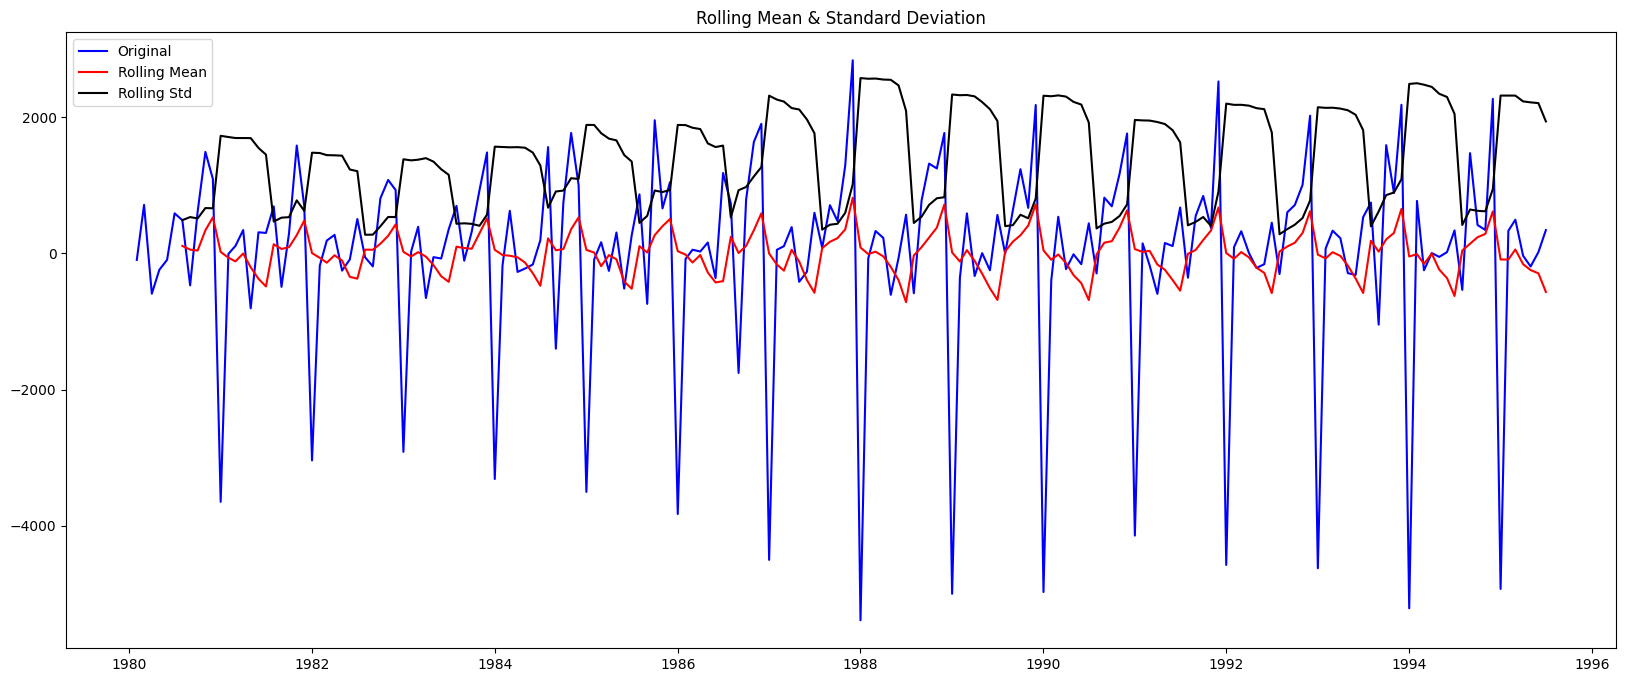

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [ ]:
test_stationarity(df['Sparkling'].diff().dropna())

We see that at  α  = 0.05 the Time Series is indeed stationary.

Plot the Autocorrelation function plots on the whole data.

In [120]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

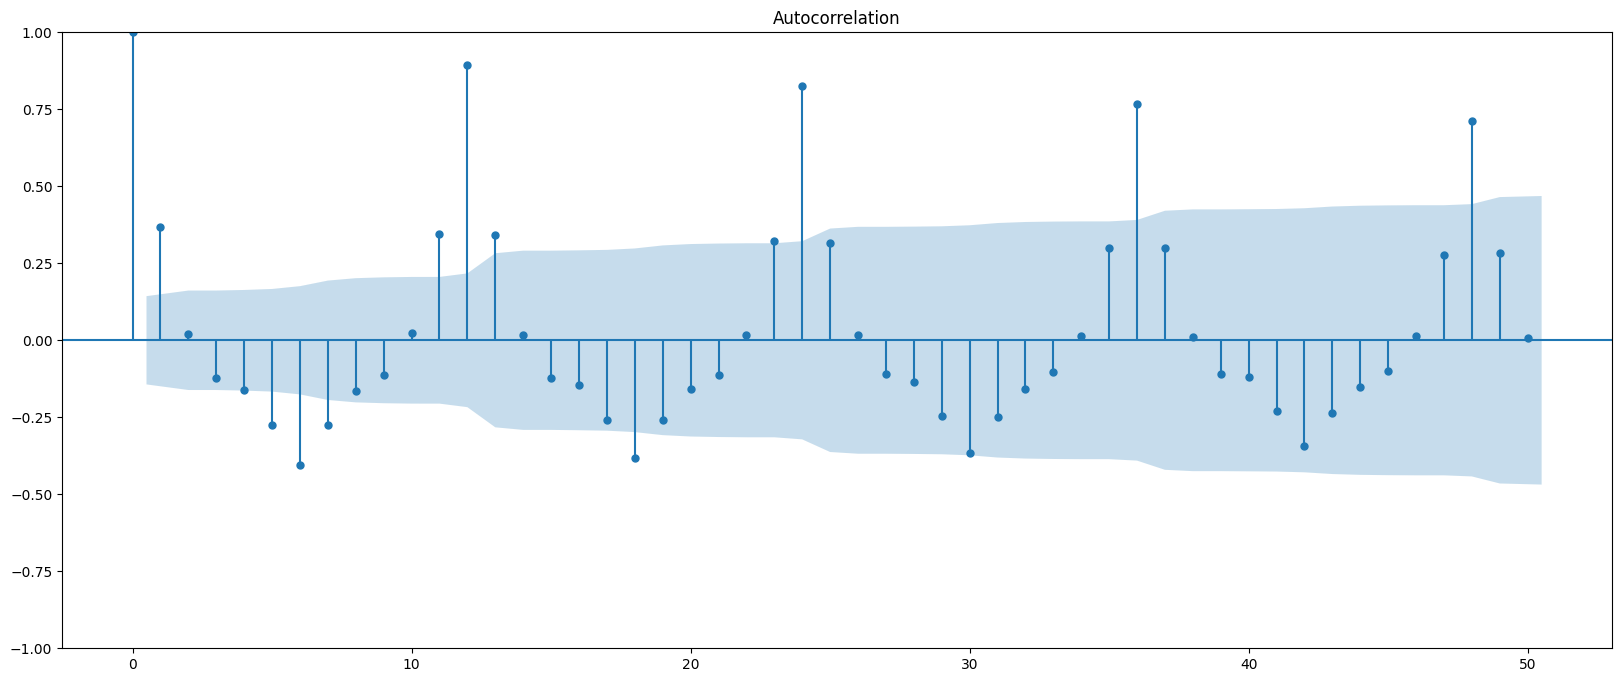

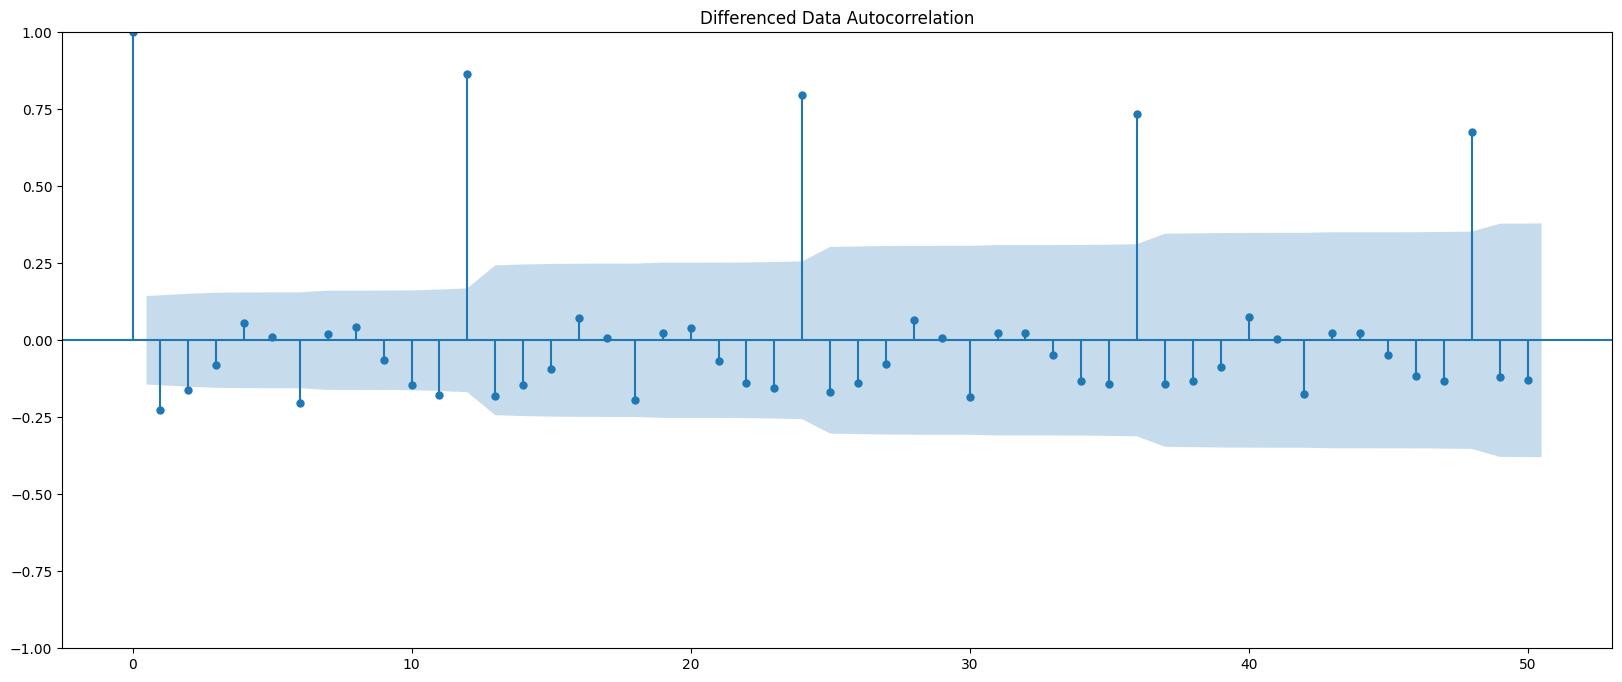

In [121]:
plot_acf(df['Sparkling'],lags=50)
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

From the above plots, we can say that there seems to be a seasonality in the data.

Split the data into train and test and plot the training and test data.
Training Data is till the end of 1991. Test Data is from the beginning of 1991 to the last time stamp provided.

In [95]:
train=df[df.index.year < 1991]
test=df[df.index.year >= 1991]

In [96]:
## This is to display multiple data frames from one cell
from IPython.display import display

In [97]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

Last few rows of Training Data


Sparkling
YearMonth            
1990-08-01       1605
1990-09-01       2424
1990-10-01       3116
1990-11-01       4286
1990-12-01       6047

First few rows of Test Data


Sparkling
YearMonth            
1991-01-01       1902
1991-02-01       2049
1991-03-01       1874
1991-04-01       1279
1991-05-01       1432

Last few rows of Test Data


Sparkling
YearMonth            
1995-03-01       1897
1995-04-01       1862
1995-05-01       1670
1995-06-01       1688
1995-07-01       2031

Check for stationarity of the Training Data Time Series.

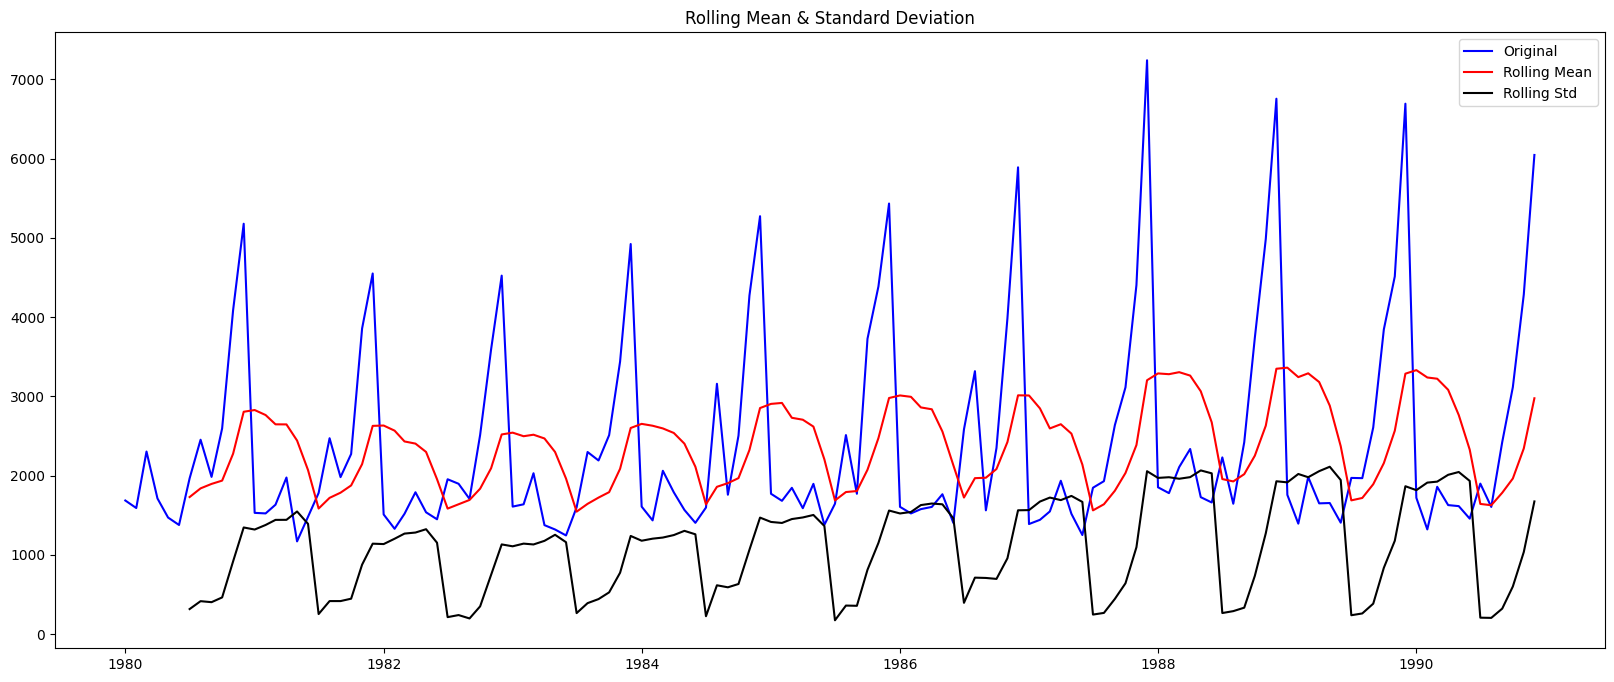

Results of Dickey-Fuller Test:
Test Statistic                  -1.208926
p-value                          0.669744
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64 



In [98]:
test_stationarity(train['Sparkling'])

We see that the series is not stationary at  α  = 0.05.

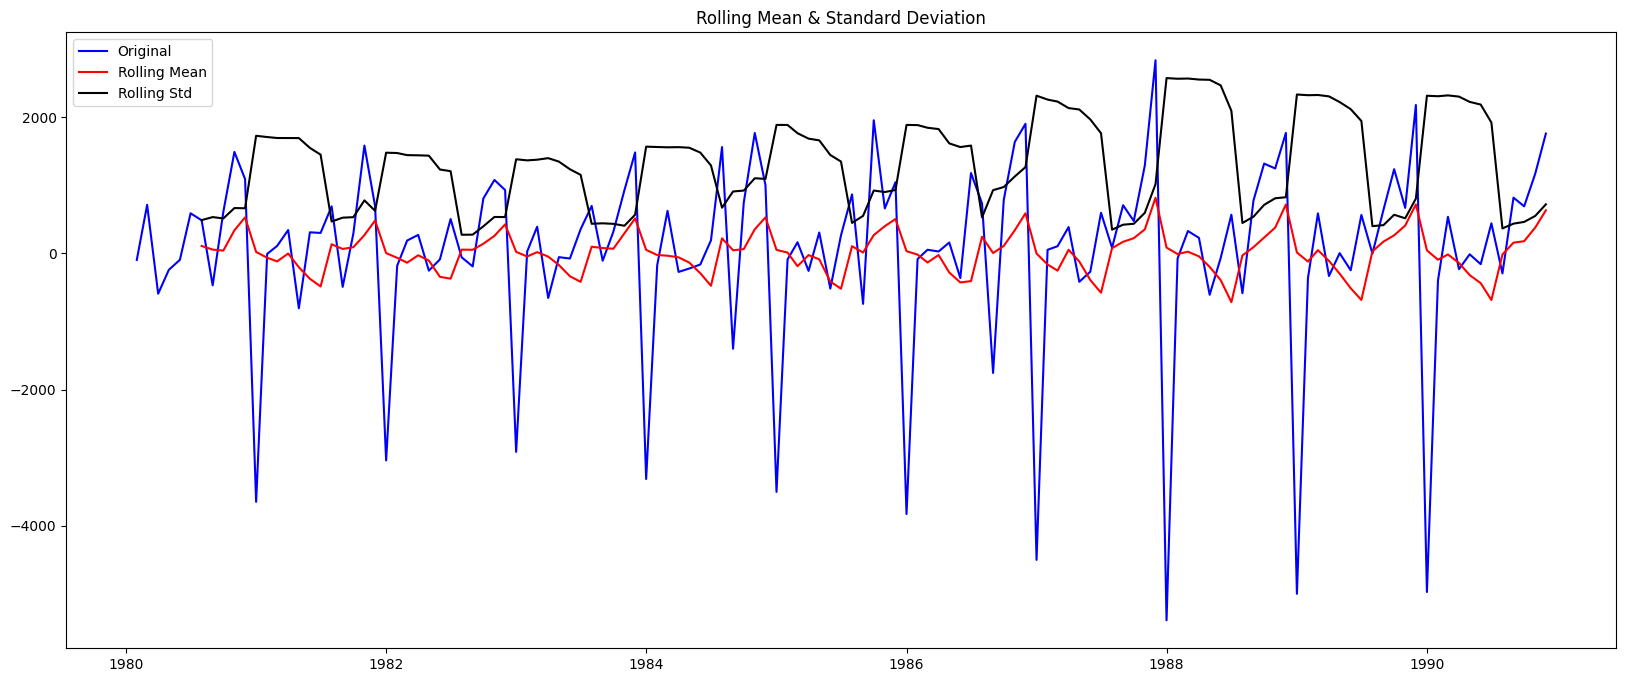

Results of Dickey-Fuller Test:
Test Statistic                -8.005007e+00
p-value                        2.280104e-12
#Lags Used                     1.100000e+01
Number of Observations Used    1.190000e+02
Critical Value (1%)           -3.486535e+00
Critical Value (5%)           -2.886151e+00
Critical Value (10%)          -2.579896e+00
dtype: float64 



In [99]:
test_stationarity(train['Sparkling'].diff().dropna())

We see that after taking a difference of order 1 the series have become stationary at  α  = 0.05.

Build an Automated version of an ARMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

In [100]:
import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [101]:
# Creating an empty Dataframe with column names only
ARMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [103]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARMA_model = ARIMA(train['Sparkling'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARMA_model.aic))
    ARMA_AIC = ARMA_AIC.append({'param':param, 'AIC': ARMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:2267.6630357855465
ARIMA(0, 1, 1) - AIC:2263.0600155919765
ARIMA(0, 1, 2) - AIC:2234.4083231352784
ARIMA(1, 1, 0) - AIC:2266.6085393190097
ARIMA(1, 1, 1) - AIC:2235.755094674255
ARIMA(1, 1, 2) - AIC:2234.5272004518056
ARIMA(2, 1, 0) - AIC:2260.36574396809
ARIMA(2, 1, 1) - AIC:2233.777626238336
ARIMA(2, 1, 2) - AIC:2213.5092125741553


In [104]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
8   (2, 1, 2)  2213.509213
17  (2, 1, 2)  2213.509213
7   (2, 1, 1)  2233.777626
16  (2, 1, 1)  2233.777626
2   (0, 1, 2)  2234.408323
11  (0, 1, 2)  2234.408323
5   (1, 1, 2)  2234.527200
14  (1, 1, 2)  2234.527200
4   (1, 1, 1)  2235.755095
13  (1, 1, 1)  2235.755095
6   (2, 1, 0)  2260.365744
15  (2, 1, 0)  2260.365744
10  (0, 1, 1)  2263.060016
1   (0, 1, 1)  2263.060016
3   (1, 1, 0)  2266.608539
12  (1, 1, 0)  2266.608539
9   (0, 1, 0)  2267.663036
0   (0, 1, 0)  2267.663036

In [105]:
train.index.freq

In [106]:
auto_ARIMA = ARIMA(train['Sparkling'], order=(2,0,1),freq=train.index.freq)

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(2, 0, 1)   Log Likelihood               -1113.295
Date:                Sun, 25 Feb 2024   AIC                           2236.591
Time:                        16:23:07   BIC                           2251.005
Sample:                    01-01-1980   HQIC                          2242.448
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2399.4586    118.215     20.297      0.000    2167.762    2631.155
ar.L1          1.2375      0.138      8.938      0.000       0.966       1.509
ar.L2         -0.5293      0.124     -4.266      0.0

Predict on the Test Set using this model and evaluate the model.

In [107]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [108]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Sparkling'],predicted_auto_ARIMA,squared=False)
print(rmse)

1269.3456584301343


In [109]:
resultsDf_9 = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA(2,0,1)'])
resultsDf = pd.concat([resultsDf, resultsDf_9])
resultsDf

RMSE
RegressionOnTime                  1389.135175
NaiveModel                        3864.279352
SimpleAverageModel                1275.081804
2pointTrailingMovingAverage        813.400684
4pointTrailingMovingAverage       1156.589694
6pointTrailingMovingAverage       1283.927428
9pointTrailingMovingAverage       1346.278315
Alpha=0.1,SES                     1338.004623
Alpha=0.1,Beta=0.1:DES            5291.879833
Alpha=0.4,Beta=0.1,Gamma=0.3:TES   378.626241
ARIMA(2,0,1)                      1269.345658

**Note: the best model for ARMA is an AR MODEL as AR(1)**

Build an Automated version of an ARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

In [110]:
  ## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [111]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [112]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Sparkling'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:2267.6630357855465
ARIMA(0, 1, 1) - AIC:2263.0600155919765
ARIMA(0, 1, 2) - AIC:2234.4083231352784
ARIMA(1, 1, 0) - AIC:2266.6085393190097
ARIMA(1, 1, 1) - AIC:2235.755094674255
ARIMA(1, 1, 2) - AIC:2234.5272004518056
ARIMA(2, 1, 0) - AIC:2260.36574396809
ARIMA(2, 1, 1) - AIC:2233.777626238336
ARIMA(2, 1, 2) - AIC:2213.5092125741553


In [113]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
8  (2, 1, 2)  2213.509213
7  (2, 1, 1)  2233.777626
2  (0, 1, 2)  2234.408323
5  (1, 1, 2)  2234.527200
4  (1, 1, 1)  2235.755095
6  (2, 1, 0)  2260.365744
1  (0, 1, 1)  2263.060016
3  (1, 1, 0)  2266.608539
0  (0, 1, 0)  2267.663036

In [114]:
train.index.freq

In [115]:
auto_ARIMA = ARIMA(train['Sparkling'], order=(2,1,2),freq=train.index.freq)

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1101.755
Date:                Sun, 25 Feb 2024   AIC                           2213.509
Time:                        16:23:10   BIC                           2227.885
Sample:                    01-01-1980   HQIC                          2219.351
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3121      0.046     28.782      0.000       1.223       1.401
ar.L2         -0.5593      0.072     -7.740      0.000      -0.701      -0.418
ma.L1         -1.9917      0.109    -18.215      0.0

Predict on the Test Set using this model and evaluate the model.

In [116]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [117]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Sparkling'],predicted_auto_ARIMA,squared=False)
print(rmse)

1299.9797494286825


In [118]:
resultsDf_10 = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA(2,1,2)'])
resultsDf = pd.concat([resultsDf, resultsDf_10])
resultsDf

RMSE
RegressionOnTime                  1389.135175
NaiveModel                        3864.279352
SimpleAverageModel                1275.081804
2pointTrailingMovingAverage        813.400684
4pointTrailingMovingAverage       1156.589694
6pointTrailingMovingAverage       1283.927428
9pointTrailingMovingAverage       1346.278315
Alpha=0.1,SES                     1338.004623
Alpha=0.1,Beta=0.1:DES            5291.879833
Alpha=0.4,Beta=0.1,Gamma=0.3:TES   378.626241
ARIMA(2,0,1)                      1269.345658
ARIMA(2,1,2)                      1299.979749

Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

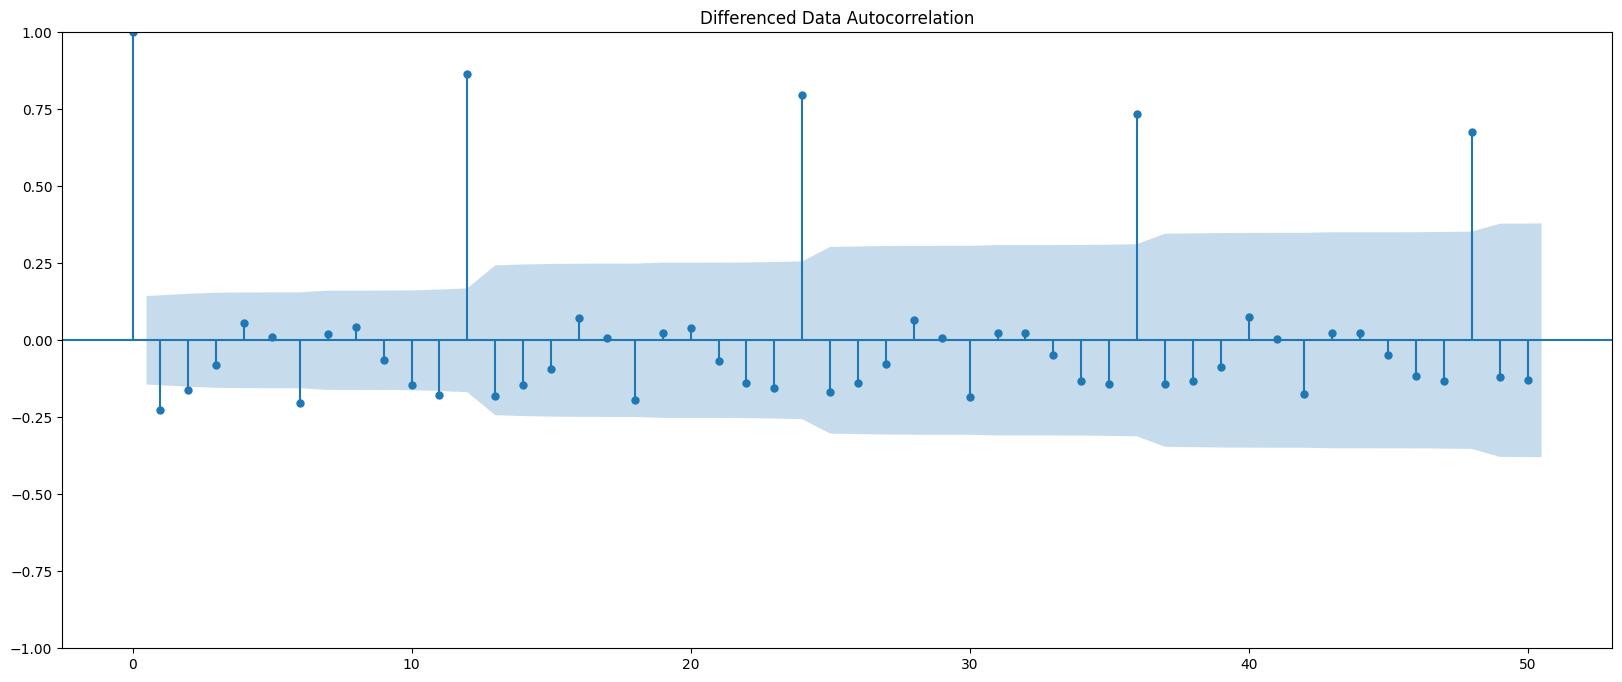

In [123]:
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

SARIMA

In [124]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [125]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (0, 1, 3)(0, 0, 3, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (1, 1, 3)(1, 0, 3, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)
Model: (2, 1, 3)(2, 0, 3, 12)
Model: (3, 1, 0)(3, 0, 0, 12)
Model: (3, 1, 1)(3, 0, 1, 12)
Model: (3, 1, 2)(3, 0, 2, 12)
Model: (3, 1, 3)(3, 0, 3, 12)


In [126]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1956.2614616844573
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1723.153364023447
SARIMA(0, 1, 0)x(0, 0, 3, 12) - AIC:4047.750993647416
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1837.4366022456677
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1806.990530138882
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1633.2108735791837
SARIMA(0, 1, 0)x(1, 0, 3, 12) - AIC:4198.7747798418895
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1648.3776153470858
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1647.2054158613616
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1630.9898053920804
SARIMA(0, 1, 0)x(2, 0, 3, 12) - AIC:3534.298287308879
SARIMA(0, 1, 0)x(3, 0, 0, 12) - AIC:1467.4574095308406
SARIMA(0, 1, 0)x(3, 0, 1, 12) - AIC:1469.1871052625634
SARIMA(0, 1, 0)x(3, 0, 2, 12) - AIC:1471.0594530064295
SARIMA(0, 1, 0)x(3, 0, 3, 12) - AIC:1660.0206716336645
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2230.162907850583
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1923.7688649566603
SARIMA(0, 1, 1)

In [127]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal          AIC
83   (1, 1, 1)  (0, 0, 3, 12)    12.000000
163  (2, 1, 2)  (0, 0, 3, 12)    16.000000
115  (1, 1, 3)  (0, 0, 3, 12)    16.000000
179  (2, 1, 3)  (0, 0, 3, 12)   967.881216
252  (3, 1, 3)  (3, 0, 0, 12)  1387.497014

In [128]:
auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(1, 1, 2),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(1, 0, 2, 12)   Log Likelihood                -770.792
Date:                            Sun, 25 Feb 2024   AIC                           1555.584
Time:                                    16:30:41   BIC                           1574.095
Sample:                                         0   HQIC                          1563.083
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6282      0.255     -2.464      0.014      -1.128      -0.128
ma.L1         -0.1040      0.225   

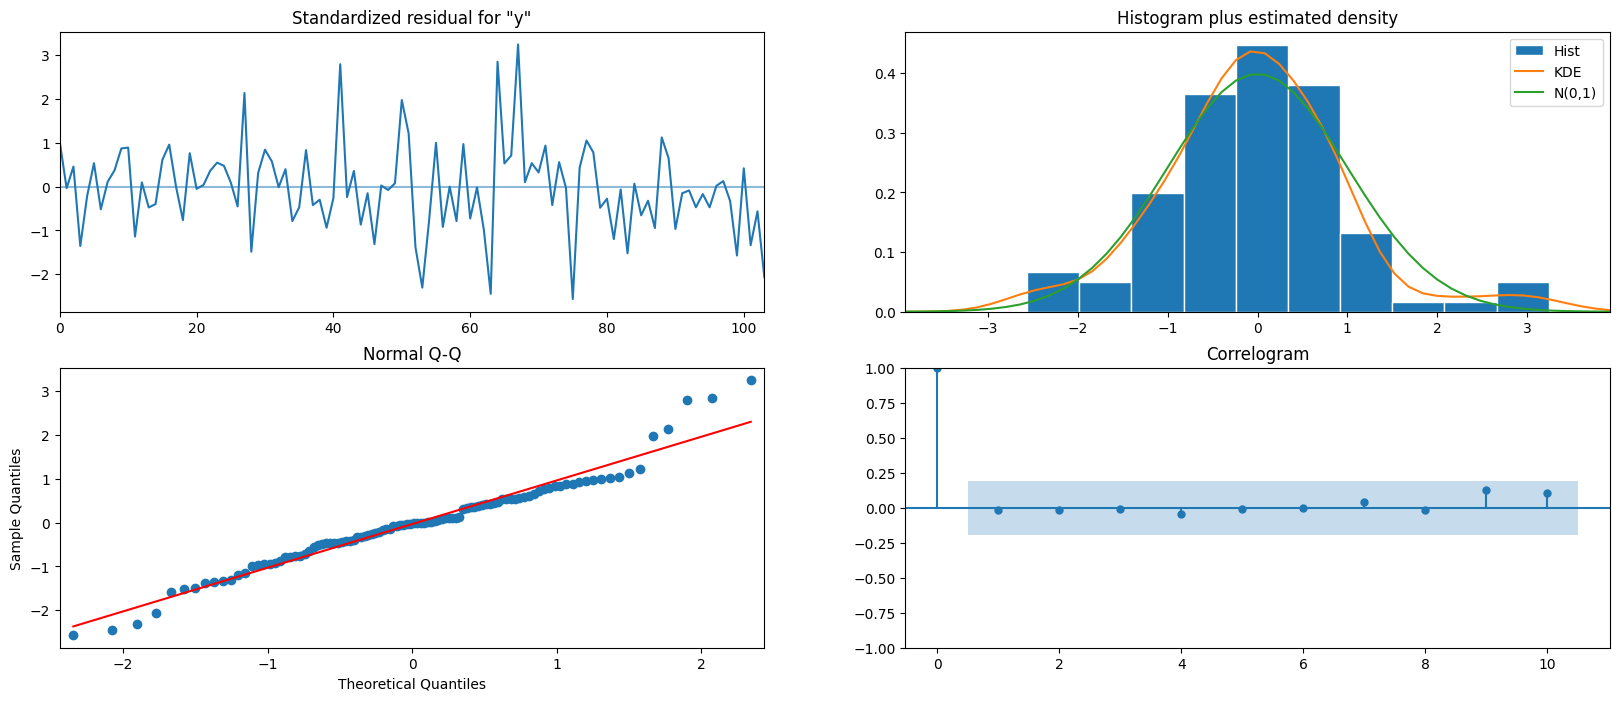

In [129]:
results_auto_SARIMA_6.plot_diagnostics()
plt.show()

Predict on the Test Set using this model and evaluate the model.

In [130]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1327.325736  388.341704     566.189983    2088.461489
1  1315.072585  402.007683     527.152005    2102.993164
2  1621.527819  402.001296     833.619758    2409.435880
3  1598.823447  407.240881     800.645987    2397.000907
4  1392.635677  407.971310     593.026602    2192.244752

In [131]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse)

528.6593092642535


In [132]:
resultsDf_11 = pd.DataFrame({'RMSE': rmse}
                           ,index=['(1,1,1),(2,0,3,12),Auto_SARIMA'])
resultsDf = pd.concat([resultsDf, resultsDf_11])
resultsDf

RMSE
RegressionOnTime                  1389.135175
NaiveModel                        3864.279352
SimpleAverageModel                1275.081804
2pointTrailingMovingAverage        813.400684
4pointTrailingMovingAverage       1156.589694
6pointTrailingMovingAverage       1283.927428
9pointTrailingMovingAverage       1346.278315
Alpha=0.1,SES                     1338.004623
Alpha=0.1,Beta=0.1:DES            5291.879833
Alpha=0.4,Beta=0.1,Gamma=0.3:TES   378.626241
ARIMA(2,0,1)                      1269.345658
ARIMA(2,1,2)                      1299.979749
(1,1,1),(2,0,3,12),Auto_SARIMA     528.659309

1.7 Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

In [133]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

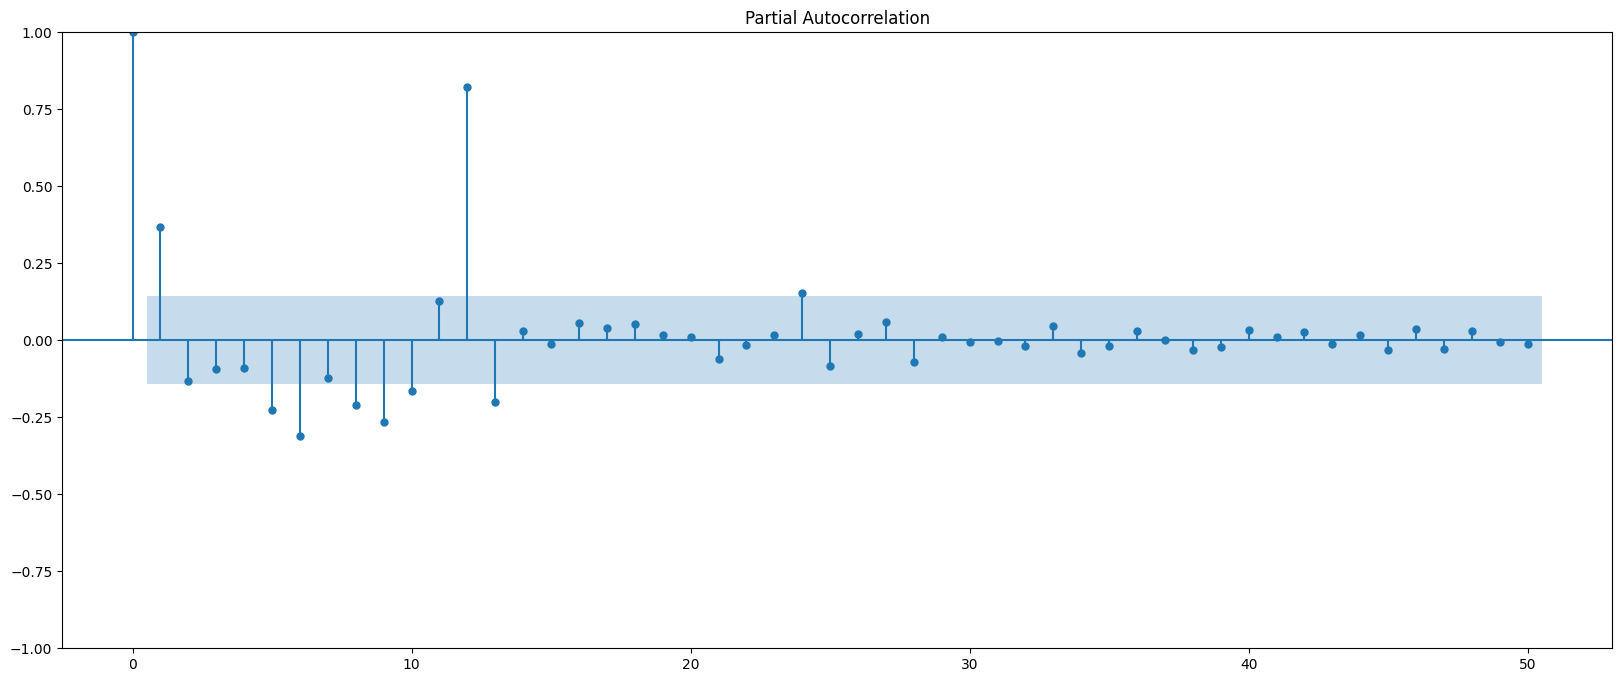

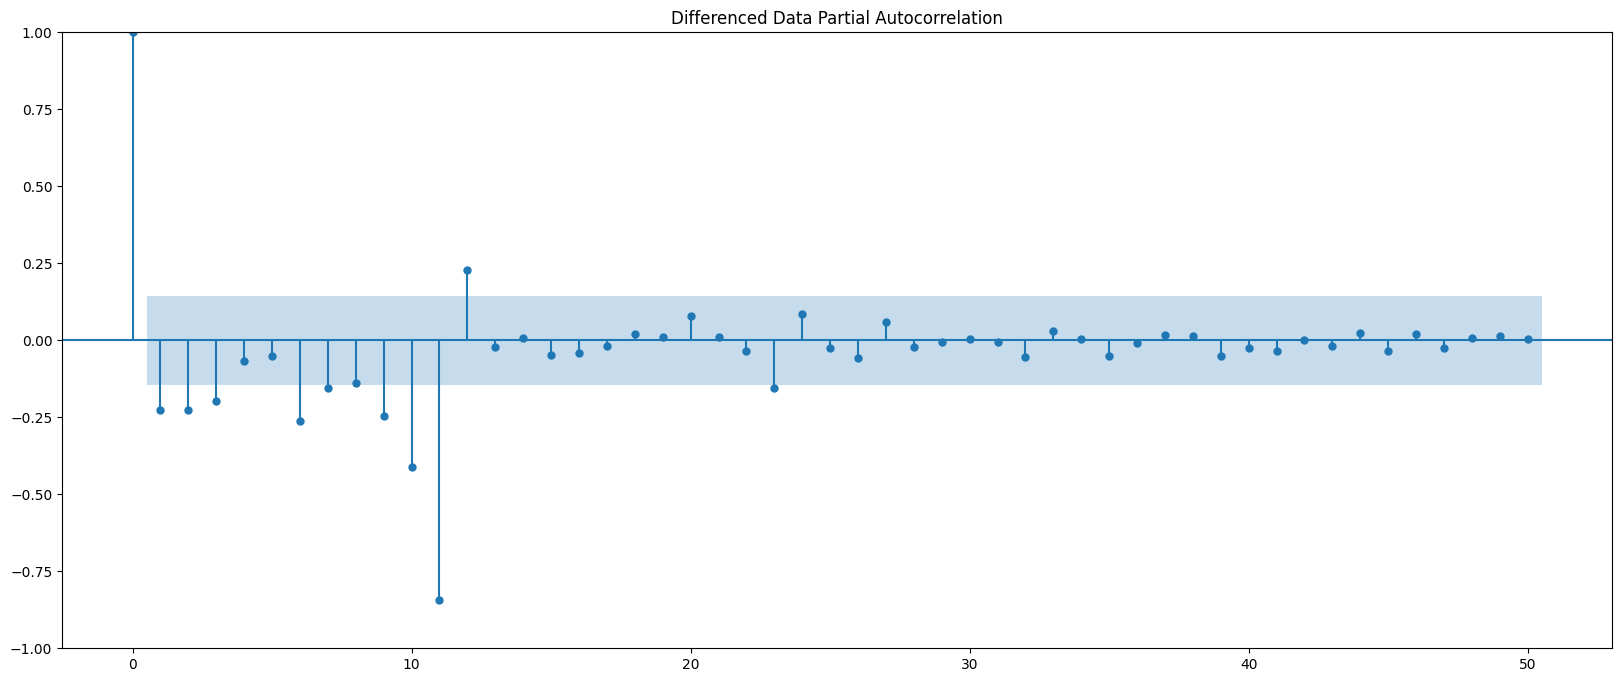

In [134]:
plot_pacf(df['Sparkling'],lags=50)
plot_pacf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

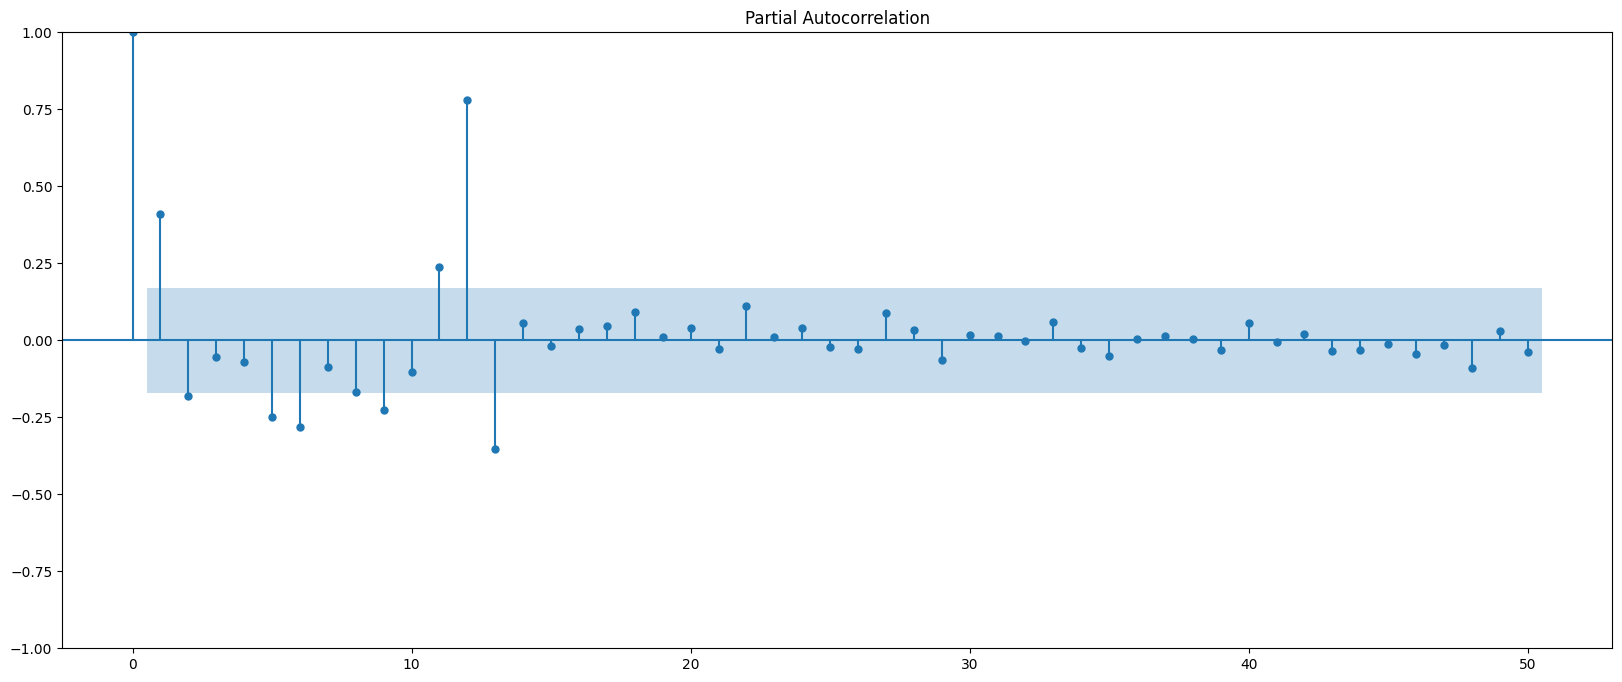

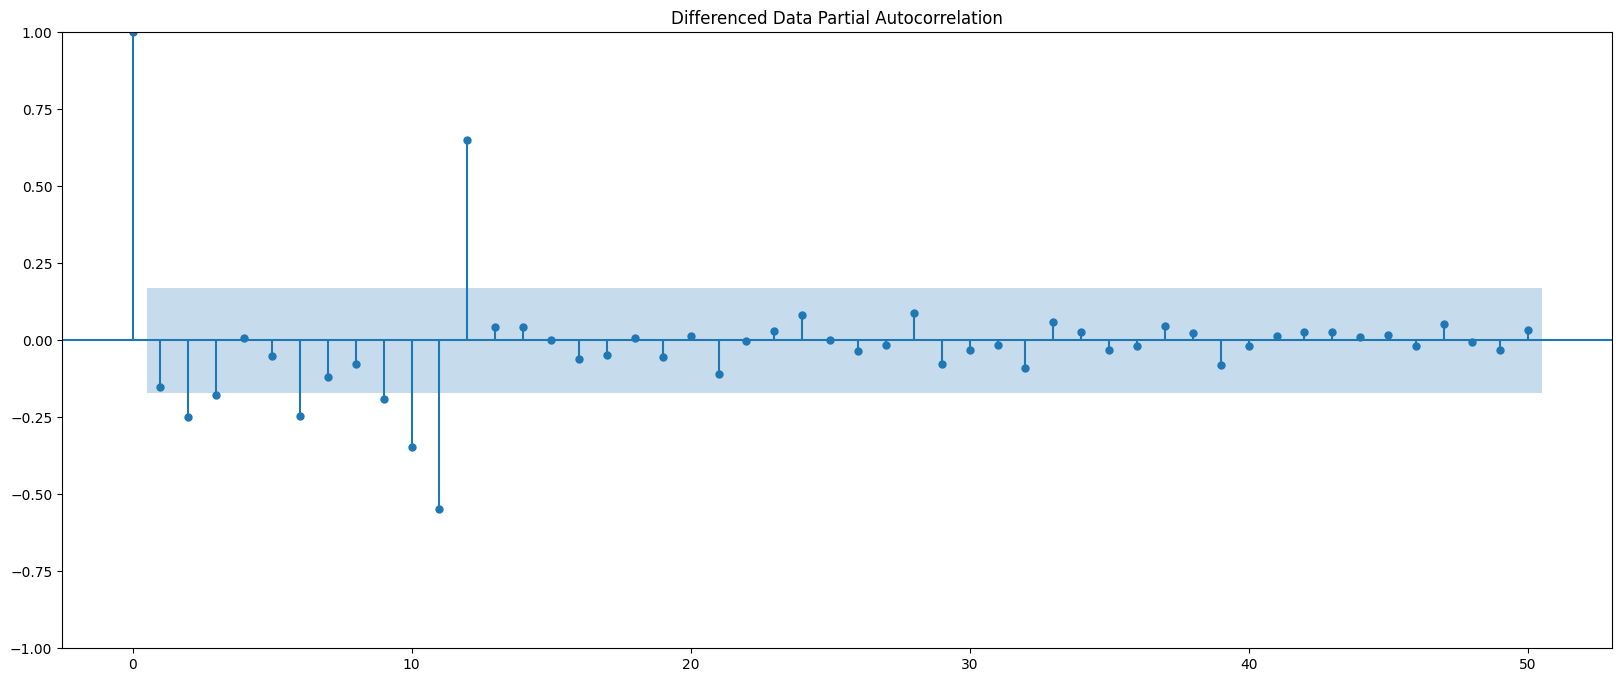

In [135]:
plot_pacf(train['Sparkling'],lags=50)
plot_pacf(train['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

In [136]:
manual_ARIMA = ARIMA(train['Sparkling'], order=(1,1,1))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1114.878
Date:                Sun, 25 Feb 2024   AIC                           2235.755
Time:                        16:30:43   BIC                           2244.381
Sample:                    01-01-1980   HQIC                          2239.260
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4494      0.043     10.366      0.000       0.364       0.534
ma.L1         -0.9996      0.102     -9.811      0.000      -1.199      -0.800
sigma2      1.401e+06   7.57e-08   1.85e+13      0.0

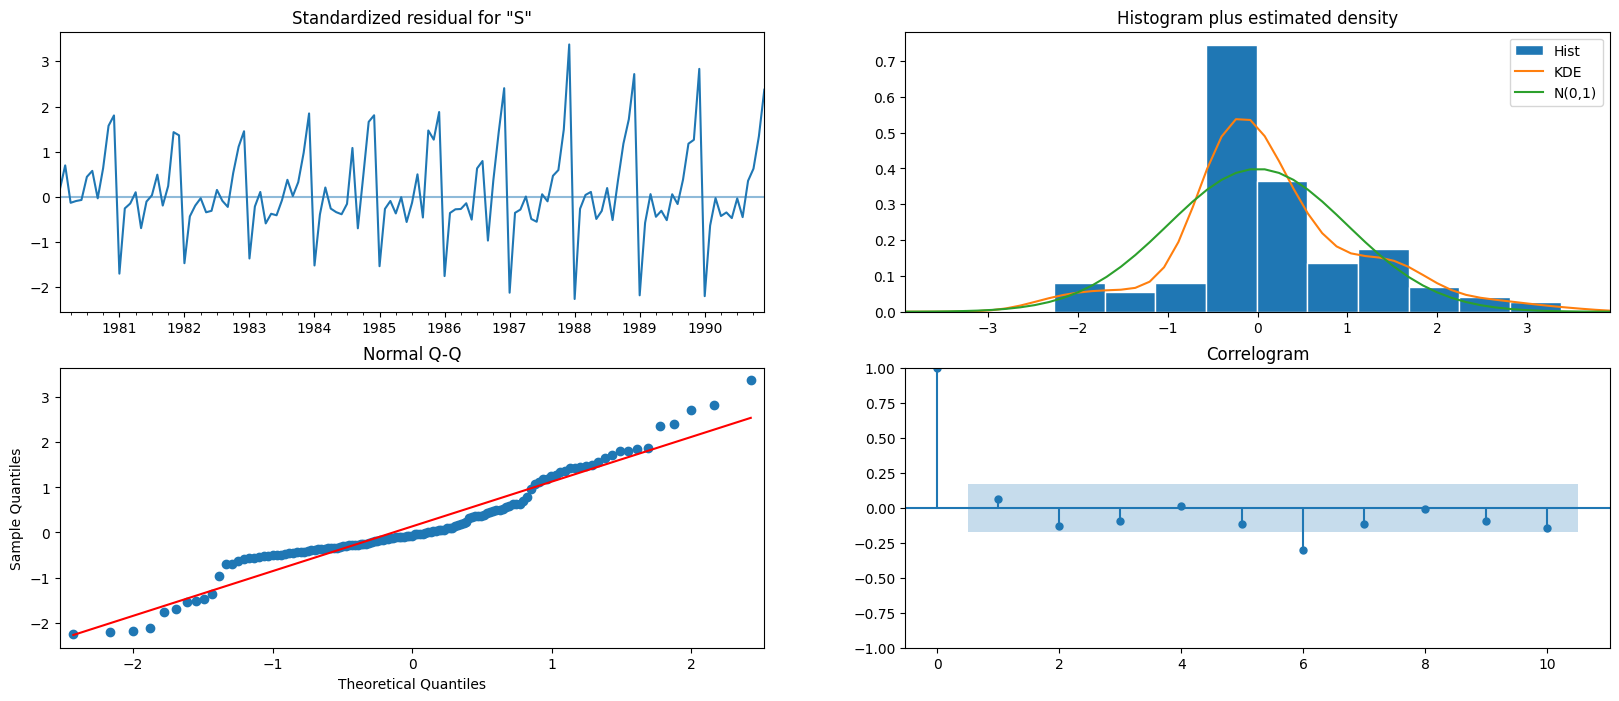

In [137]:
results_manual_ARIMA.plot_diagnostics();

In [138]:

predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))
rmse = mean_squared_error(test['Sparkling'],predicted_manual_ARIMA,squared=False)
print('RMSE:',rmse)


RMSE: 1319.9367341873026


In [139]:
resultsDf_12 = pd.DataFrame({'RMSE': rmse}
                           ,index=['ARIMA(3,1,3)'])
resultsDf = pd.concat([resultsDf, resultsDf_12])
resultsDf

RMSE
RegressionOnTime                  1389.135175
NaiveModel                        3864.279352
SimpleAverageModel                1275.081804
2pointTrailingMovingAverage        813.400684
4pointTrailingMovingAverage       1156.589694
6pointTrailingMovingAverage       1283.927428
9pointTrailingMovingAverage       1346.278315
Alpha=0.1,SES                     1338.004623
Alpha=0.1,Beta=0.1:DES            5291.879833
Alpha=0.4,Beta=0.1,Gamma=0.3:TES   378.626241
ARIMA(2,0,1)                      1269.345658
ARIMA(2,1,2)                      1299.979749
(1,1,1),(2,0,3,12),Auto_SARIMA     528.659309
ARIMA(3,1,3)                      1319.936734

Model 12 : Manual SARIMA

In [140]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [141]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforc1e_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -882.088
Date:                            Sun, 25 Feb 2024   AIC                           1774.175
Time:                                    16:30:44   BIC                           1788.071
Sample:                                         0   HQIC                          1779.818
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1957      0.104      1.878      0.060      -0.009       0.400
ma.L1         -0.9404      0.053   

In [142]:
SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_manual_SARIMA.aic},
                               ignore_index=True)
SARIMA_AIC

param       seasonal          AIC
0  (3, 1, 3)  (3, 0, 3, 12)  1774.175347

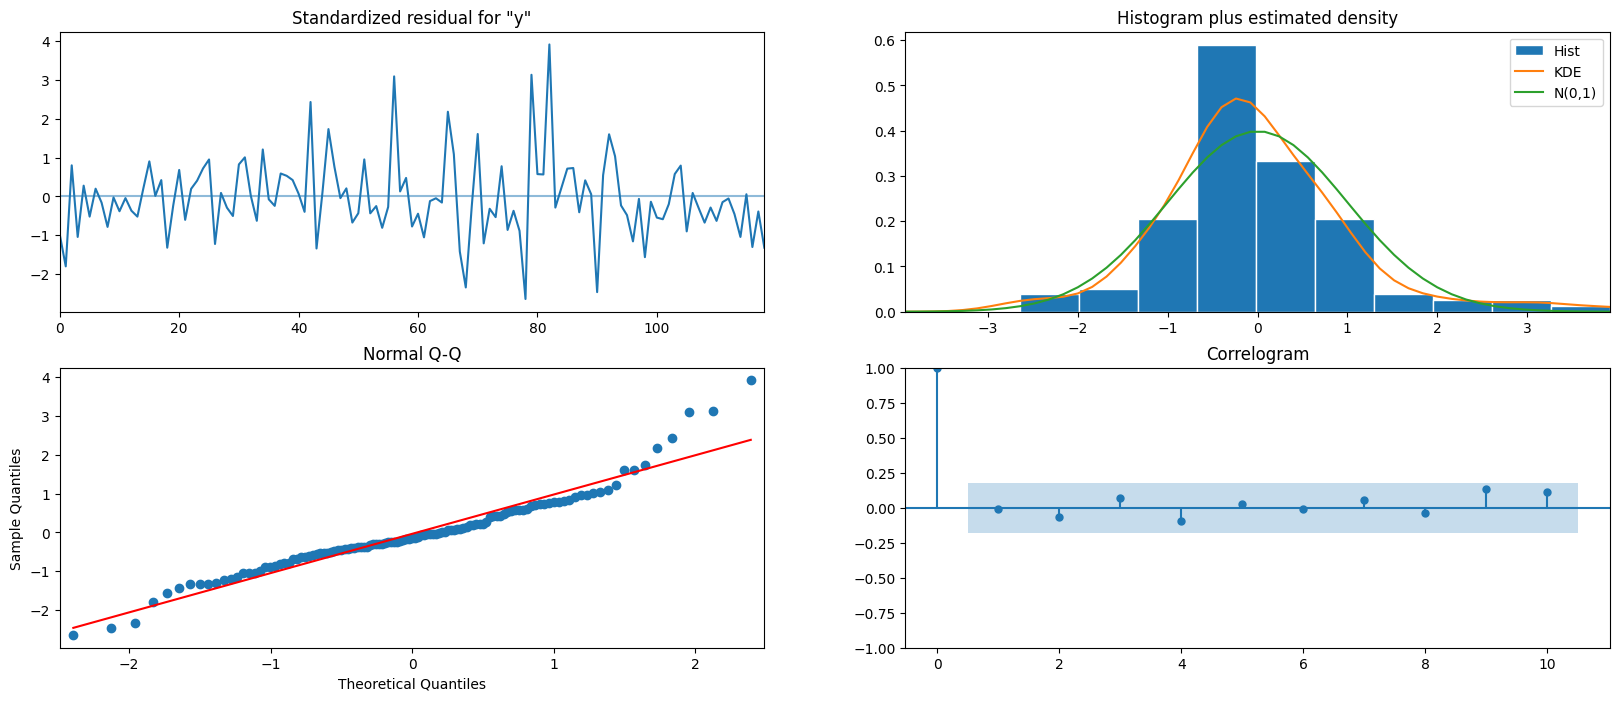

In [143]:
results_manual_SARIMA.plot_diagnostics()
plt.show()

In [144]:
predicted_manual_SARIMA_6 = results_manual_SARIMA.get_forecast(steps=len(test))
predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1543.900066  388.532073     782.391196    2305.408935
1  1311.208243  400.994085     525.274280    2097.142207
2  1810.538050  403.246216    1020.189990    2600.886110
3  1650.451750  404.472621     857.699979    2443.203520
4  1561.609699  405.532761     766.780094    2356.439305

In [145]:
rmse_manual_sarima = mean_squared_error(test['Sparkling'],predicted_manual_SARIMA_6.predicted_mean,squared=False)
print(rmse_manual_sarima)

359.61245426166005


In [146]:
resultsDf_13 = pd.DataFrame({'RMSE': rmse_manual_sarima}
                           ,index=['(1,1,1)(1,1,1,12),Manual_SARIMA'])
resultsDf = pd.concat([resultsDf, resultsDf_13])
resultsDf

RMSE
RegressionOnTime                  1389.135175
NaiveModel                        3864.279352
SimpleAverageModel                1275.081804
2pointTrailingMovingAverage        813.400684
4pointTrailingMovingAverage       1156.589694
6pointTrailingMovingAverage       1283.927428
9pointTrailingMovingAverage       1346.278315
Alpha=0.1,SES                     1338.004623
Alpha=0.1,Beta=0.1:DES            5291.879833
Alpha=0.4,Beta=0.1,Gamma=0.3:TES   378.626241
ARIMA(2,0,1)                      1269.345658
ARIMA(2,1,2)                      1299.979749
(1,1,1),(2,0,3,12),Auto_SARIMA     528.659309
ARIMA(3,1,3)                      1319.936734
(1,1,1)(1,1,1,12),Manual_SARIMA    359.612454

1.8 Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [147]:
resultsDf.sort_values(by=['RMSE'])

RMSE
(1,1,1)(1,1,1,12),Manual_SARIMA    359.612454
Alpha=0.4,Beta=0.1,Gamma=0.3:TES   378.626241
(1,1,1),(2,0,3,12),Auto_SARIMA     528.659309
2pointTrailingMovingAverage        813.400684
4pointTrailingMovingAverage       1156.589694
ARIMA(2,0,1)                      1269.345658
SimpleAverageModel                1275.081804
6pointTrailingMovingAverage       1283.927428
ARIMA(2,1,2)                      1299.979749
ARIMA(3,1,3)                      1319.936734
Alpha=0.1,SES                     1338.004623
9pointTrailingMovingAverage       1346.278315
RegressionOnTime                  1389.135175
NaiveModel                        3864.279352
Alpha=0.1,Beta=0.1:DES            5291.879833

1.9 Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

In [148]:
date = pd.date_range(start='8/1/1995', end='7/1/1996', freq='MS')
date

DatetimeIndex(['1995-08-01', '1995-09-01', '1995-10-01', '1995-11-01',
               '1995-12-01', '1996-01-01', '1996-02-01', '1996-03-01',
               '1996-04-01', '1996-05-01', '1996-06-01', '1996-07-01'],
              dtype='datetime64[ns]', freq='MS')

In [149]:
future_predictions=pd.DataFrame(columns=['Sales_Predictions'],index=date)

In [150]:
TES_train = df.copy()

In [151]:
model_TES_tm_sm = ExponentialSmoothing(TES_train['Sparkling'],trend='multiplicative',seasonal='multiplicative')
alpha=0.4
beta=0.1
gamma=0.3
model_TES = model_TES_tm_sm.fit(smoothing_level=alpha,smoothing_slope=beta,smoothing_seasonal=gamma,
                                optimized=False,use_brute=True)
prediction=model_TES.forecast(steps=12)

In [152]:
future_predictions['Sales_Predictions']=prediction
future_predictions

Sales_Predictions
1995-08-01        1988.782193
1995-09-01        2652.762887
1995-10-01        3483.872246
1995-11-01        4354.989747
1995-12-01        6900.103171
1996-01-01        1546.800546
1996-02-01        1981.361768
1996-03-01        2245.459724
1996-04-01        2151.066942
1996-05-01        1929.355815
1996-06-01        1830.619260
1996-07-01        2272.156151

In [153]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 95% confidence intervals.
pred_df = pd.DataFrame({'lower_CI':prediction - 1.96*np.std(model_TES.resid,ddof=1),
                          'prediction':prediction,
                          'upper_ci': prediction + 1.96*np.std(model_TES.resid,ddof=1)})
pred_df.head()

lower_CI   prediction     upper_ci
1995-08-01  1213.490105  1988.782193  2764.074282
1995-09-01  1877.470798  2652.762887  3428.054975
1995-10-01  2708.580157  3483.872246  4259.164335
1995-11-01  3579.697659  4354.989747  5130.281836
1995-12-01  6124.811083  6900.103171  7675.395260

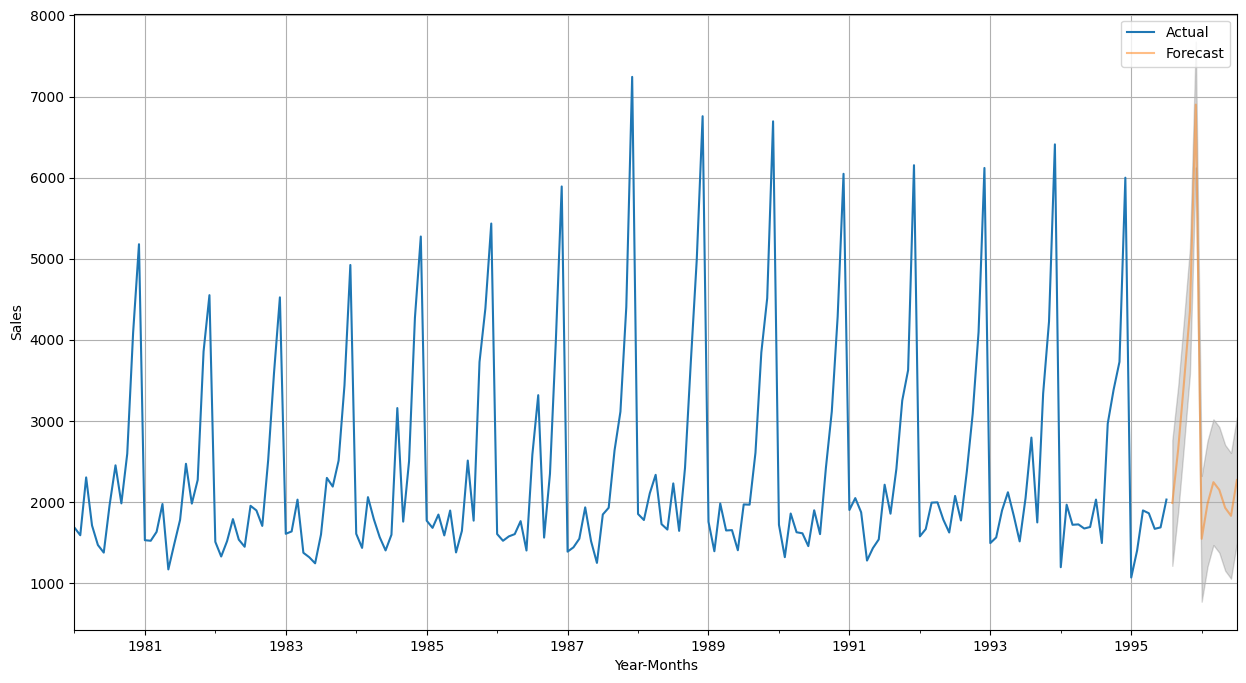

In [154]:
# plot the forecast along with the confidence band

axis = df['Sparkling'].plot(label='Actual', figsize=(15,8))
pred_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_df.index, pred_df['lower_CI'], pred_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.grid()
plt.show()